#### Prakticni deo seminarskog rada "___Kvalitet podataka___" iz predmeta __Prikupljanje i predobrada podataka za Masinsko ucenje__

__Nastasija Stankovic 1622__

<span style="font-size:1.4em;">U njemu ce biti predstavljeni prakticni primeri na temu:</span> 

<span style="color:blue;font-size:1.3em;">__raspodela podataka__</span>    
<span style="color:orange;font-size:1.3em;">__mere centralne tendencije__</span>    
<span style="color:green;font-size:1.3em;">__korelacija__</span>  
<span style="color:purple;font-size:1.3em;">__varijansa__</span>

#### Importovanje biblioteka

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, log_loss,make_scorer,precision_recall_curve,average_precision_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer


## Prvi dataset

Dataset: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

14 kontinualnih atributa: Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4   
2 integer atributa: Area i ConvexArea   
1 kategoricki: Class   
   

### Deskriptivna analiza

In [266]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx') 

In [267]:
print("Shape:",data.shape) 
data.head(10)

Shape: (13611, 17)


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   
7  30519    629.727       212.996755       182.737204      1.165591   
8  30685    635.681       213.534145       183.157146      1.165852   
9  30834    631.934       217.227813       180.897469      1.200834   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6      0.489478       30970     196.988633  0.762402  0.984081   0.853080   
7      0.513760       30847     197.124320  0.770682  0.989367   0.967109   
8      0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9      0.553642       31120     198.139012  0.783683  0.990810   0.970278   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER  
5     0.923726      0.007020      0.003153      0.853270      0.999236  SEKER  
6     0.933374      0.006925      0.003242      0.871186      0.999049  SEKER  
7     0.925480      0.006979      0.003158      0.856514      0.998345  SEKER  
8     0.925658      0.006959      0.003152      0.856844      0.998953  SEKER  
9     0.912125      0.007045      0.003008      0.831973      0.999061  SEKER

In [268]:
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [269]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [270]:
dups = data.duplicated()
print("Broj duplikata pre brisanja:", dups.sum())
data.drop_duplicates(inplace=True)
print("Broj duplikata posle brisanja:", data.duplicated().sum())

Broj duplikata pre brisanja: 68
Broj duplikata posle brisanja: 0


In [271]:
data.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13543.000000  13543.000000     13543.000000     13543.000000   
mean    53048.460385    854.993406       319.895602       202.365321   
std     29392.438324    214.722684        85.809260        45.051632   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36282.500000    703.230000       253.086806       175.886357   
50%     44580.000000    793.896000       296.404589       192.491117   
75%     61382.000000    977.146500       376.312489       217.245403   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13543.000000  13543.000000   13543.000000   13543.000000  13543.000000   
mean       1.581075      0.750315   53767.986709     253.034094      0.749829   
std        0.245245      0.091858   29844.248525      59.307709      0.048939   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.430662      0.715144   36673.000000     214.933277      0.718735   
50%        1.549860      0.763997   45122.000000     238.245711      0.759903   
75%        1.703916      0.809671   62360.000000     279.560351      0.786849   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13543.000000  13543.000000  13543.000000  13543.000000  13543.000000   
mean       0.987152      0.873671      0.800352      0.006561      0.001719   
std        0.004650      0.059393      0.061464      0.001130      0.000595   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985678      0.833410      0.763228      0.005893      0.001158   
50%        0.988288      0.883490      0.801514      0.006643      0.001700   
75%        0.990019      0.917031      0.834470      0.007270      0.002173   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13543.000000  13543.000000  
mean       0.644341      0.995078  
std        0.098653      0.004347  
min        0.410339      0.947687  
25%        0.582517      0.993720  
50%        0.642424      0.996393  
75%        0.696341      0.997891  
max        0.974767      0.999733

### Raspodela podataka

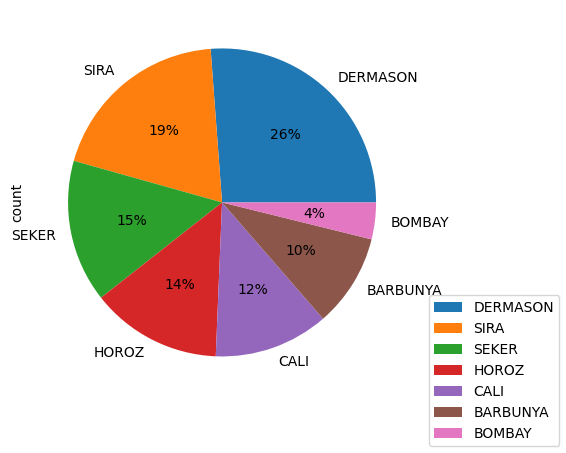

In [272]:
plt.figure(figsize=(7, 5))
pie = data.Class.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()

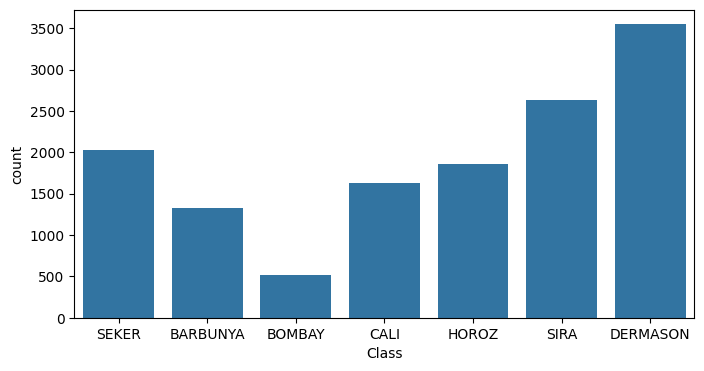

In [273]:
plt.figure(figsize=(8,4))
sns.countplot(x='Class',data=data)
plt.show()

Primećuje se da nije jednaka raspodela podataka kroz svih sedam klasa pasulja, te se očekuje da će biti potrebno primeniti tehnike za balansiranje dataset-a.

Balansiranje dataseta

In [274]:
from imblearn.combine import SMOTEENN  

data1=data.copy()

X = data1.drop('Class', axis=1)
y = data1['Class']

print("Before SMOTEENN, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before SMOTEENN, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before SMOTEENN, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before SMOTEENN, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before SMOTEENN, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before SMOTEENN, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before SMOTEENN, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

sm = SMOTEENN(random_state=2)  
X_res, y_res = sm.fit_resample(X, y.ravel())

balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['Class'] = y_res

print("After SMOTEENN, counts of 'DERMASON': {}".format(sum(y_res == 'DERMASON')))
print("After SMOTEENN, counts of 'SIRA': {}".format(sum(y_res == 'SIRA')))
print("After SMOTEENN, counts of 'SEKER': {}".format(sum(y_res == 'SEKER')))
print("After SMOTEENN, counts of 'HOROZ': {}".format(sum(y_res == 'HOROZ')))
print("After SMOTEENN, counts of 'CALI': {}".format(sum(y_res == 'CALI')))
print("After SMOTEENN, counts of 'BARBUNYA': {}".format(sum(y_res == 'BARBUNYA')))
print("After SMOTEENN, counts of 'BOMBAY': {}\n".format(sum(y_res == 'BOMBAY')))

Before SMOTEENN, counts of 'DERMASON': 3546
Before SMOTEENN, counts of 'SIRA': 2636
Before SMOTEENN, counts of 'SEKER': 2027
Before SMOTEENN, counts of 'HOROZ': 1860
Before SMOTEENN, counts of 'CALI': 1630
Before SMOTEENN, counts of 'BARBUNYA': 1322
Before SMOTEENN, counts of 'BOMBAY': 522



After SMOTEENN, counts of 'DERMASON': 2496
After SMOTEENN, counts of 'SIRA': 2099
After SMOTEENN, counts of 'SEKER': 2462
After SMOTEENN, counts of 'HOROZ': 2441
After SMOTEENN, counts of 'CALI': 2211
After SMOTEENN, counts of 'BARBUNYA': 2185
After SMOTEENN, counts of 'BOMBAY': 3541



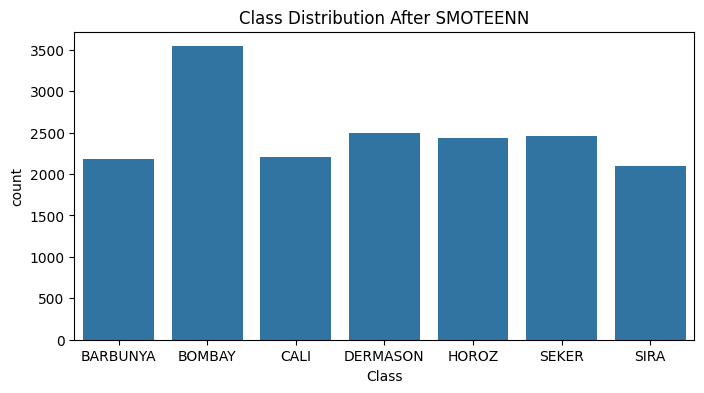

In [275]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=balanced_df)
plt.title("Class Distribution After SMOTEENN")
plt.show()

One hot encoding klase Class

In [276]:
print(np.unique(data.Class))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [277]:
class_mapping = {
    'BARBUNYA': 0,
    'BOMBAY': 1,
    'CALI': 2,
    'DERMASON': 3,
    'HOROZ': 4,
    'SEKER': 5,
    'SIRA': 6
}

data['Class'] = data['Class'].replace(class_mapping)

In [278]:
class_mapping = {
    'BARBUNYA': 0,
    'BOMBAY': 1,
    'CALI': 2,
    'DERMASON': 3,
    'HOROZ': 4,
    'SEKER': 5,
    'SIRA': 6
}

balanced_df['Class'] = balanced_df['Class'].replace(class_mapping)

In [279]:
def print_attribute_ranges(dataframe):
    for column in dataframe.columns:
        if column != "Class":
            column_range = dataframe[column].min(), dataframe[column].max()
            print(f"{column} range: {column_range}")

Provera opsega atributa

In [280]:
print_attribute_ranges(data)

Area range: (20420, 254616)
Perimeter range: (524.736, 1985.37)
MajorAxisLength range: (183.6011650038393, 738.8601534818813)
MinorAxisLength range: (122.51265345074418, 460.1984968278401)
AspectRation range: (1.0248675960667681, 2.430306446836626)
Eccentricity range: (0.21895126335356507, 0.9114229684680053)
ConvexArea range: (20684, 263261)
EquivDiameter range: (161.24376423134018, 569.3743583287609)
Extent range: (0.55531471681117, 0.8661946405648266)
Solidity range: (0.9192461570857022, 0.9946774999456888)
roundness range: (0.4896182562412148, 0.9906853996160323)
Compactness range: (0.6405767589768725, 0.9873029693778109)
ShapeFactor1 range: (0.0027780126683855494, 0.010451169324378654)
ShapeFactor2 range: (0.0005641690180332927, 0.0036649719644516834)
ShapeFactor3 range: (0.41033858414131424, 0.9747671533422431)
ShapeFactor4 range: (0.9476874027098624, 0.9997325300471389)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

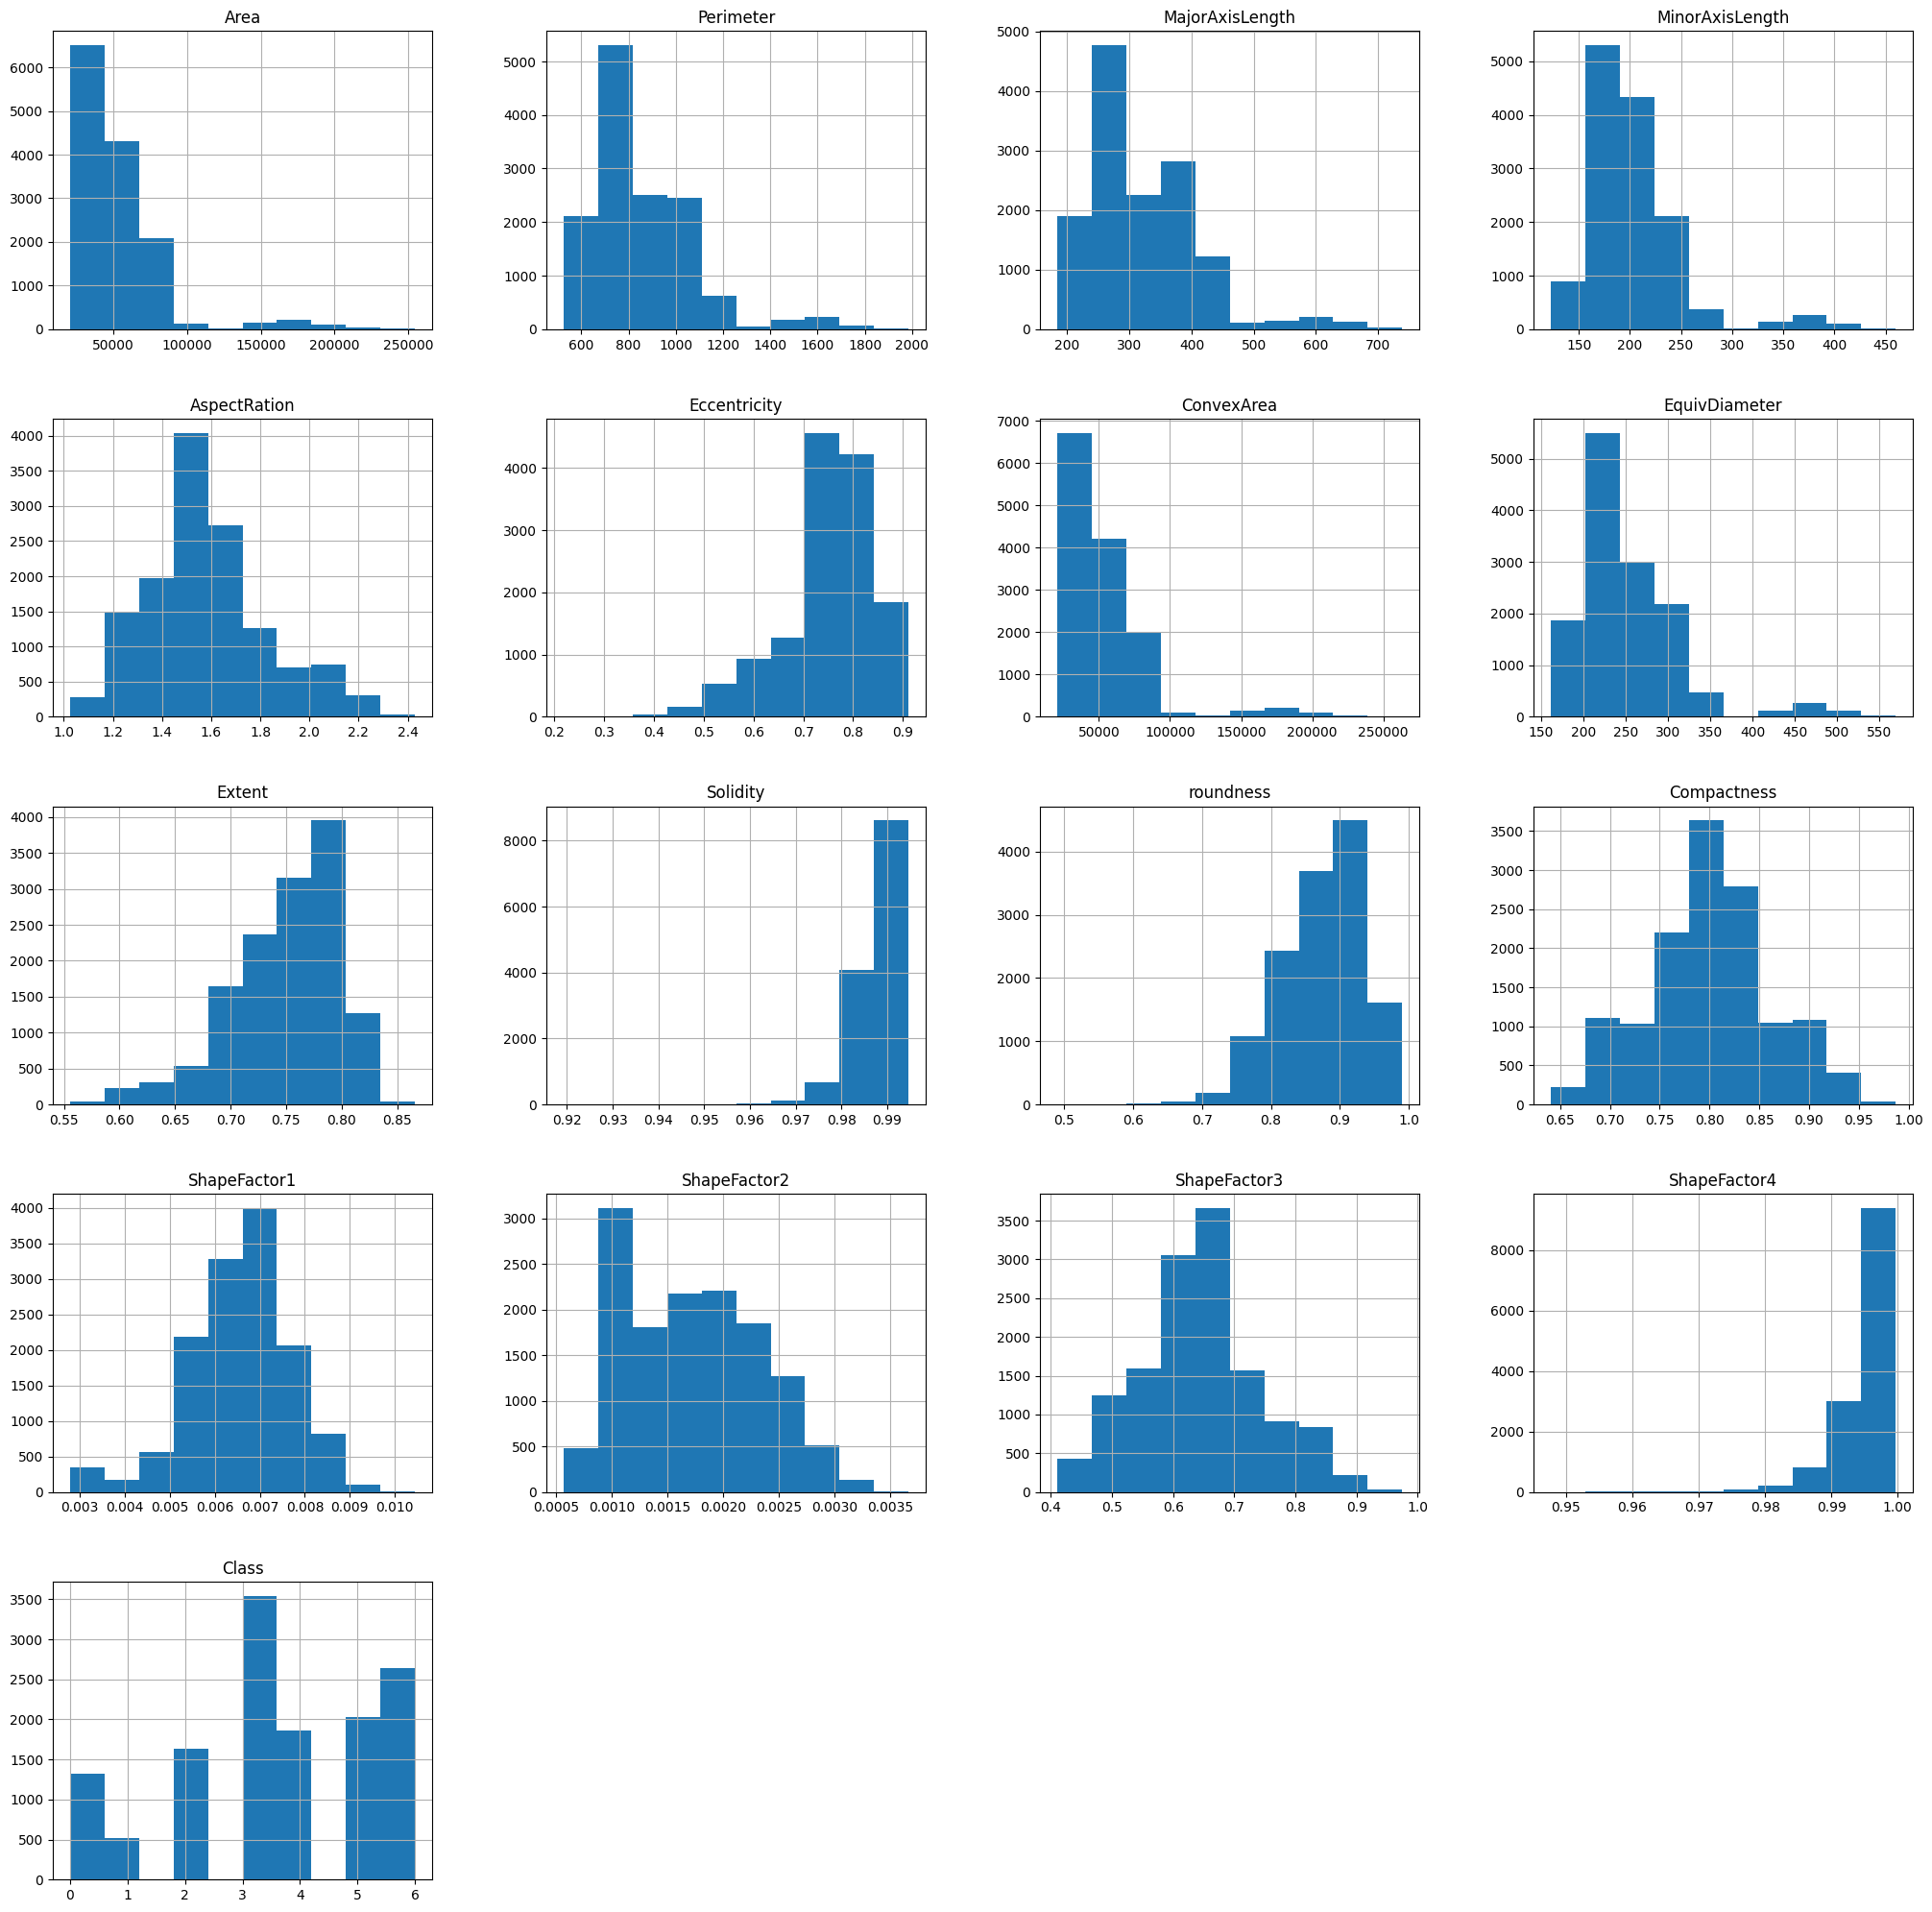

In [281]:
data.hist(figsize = (25,25))

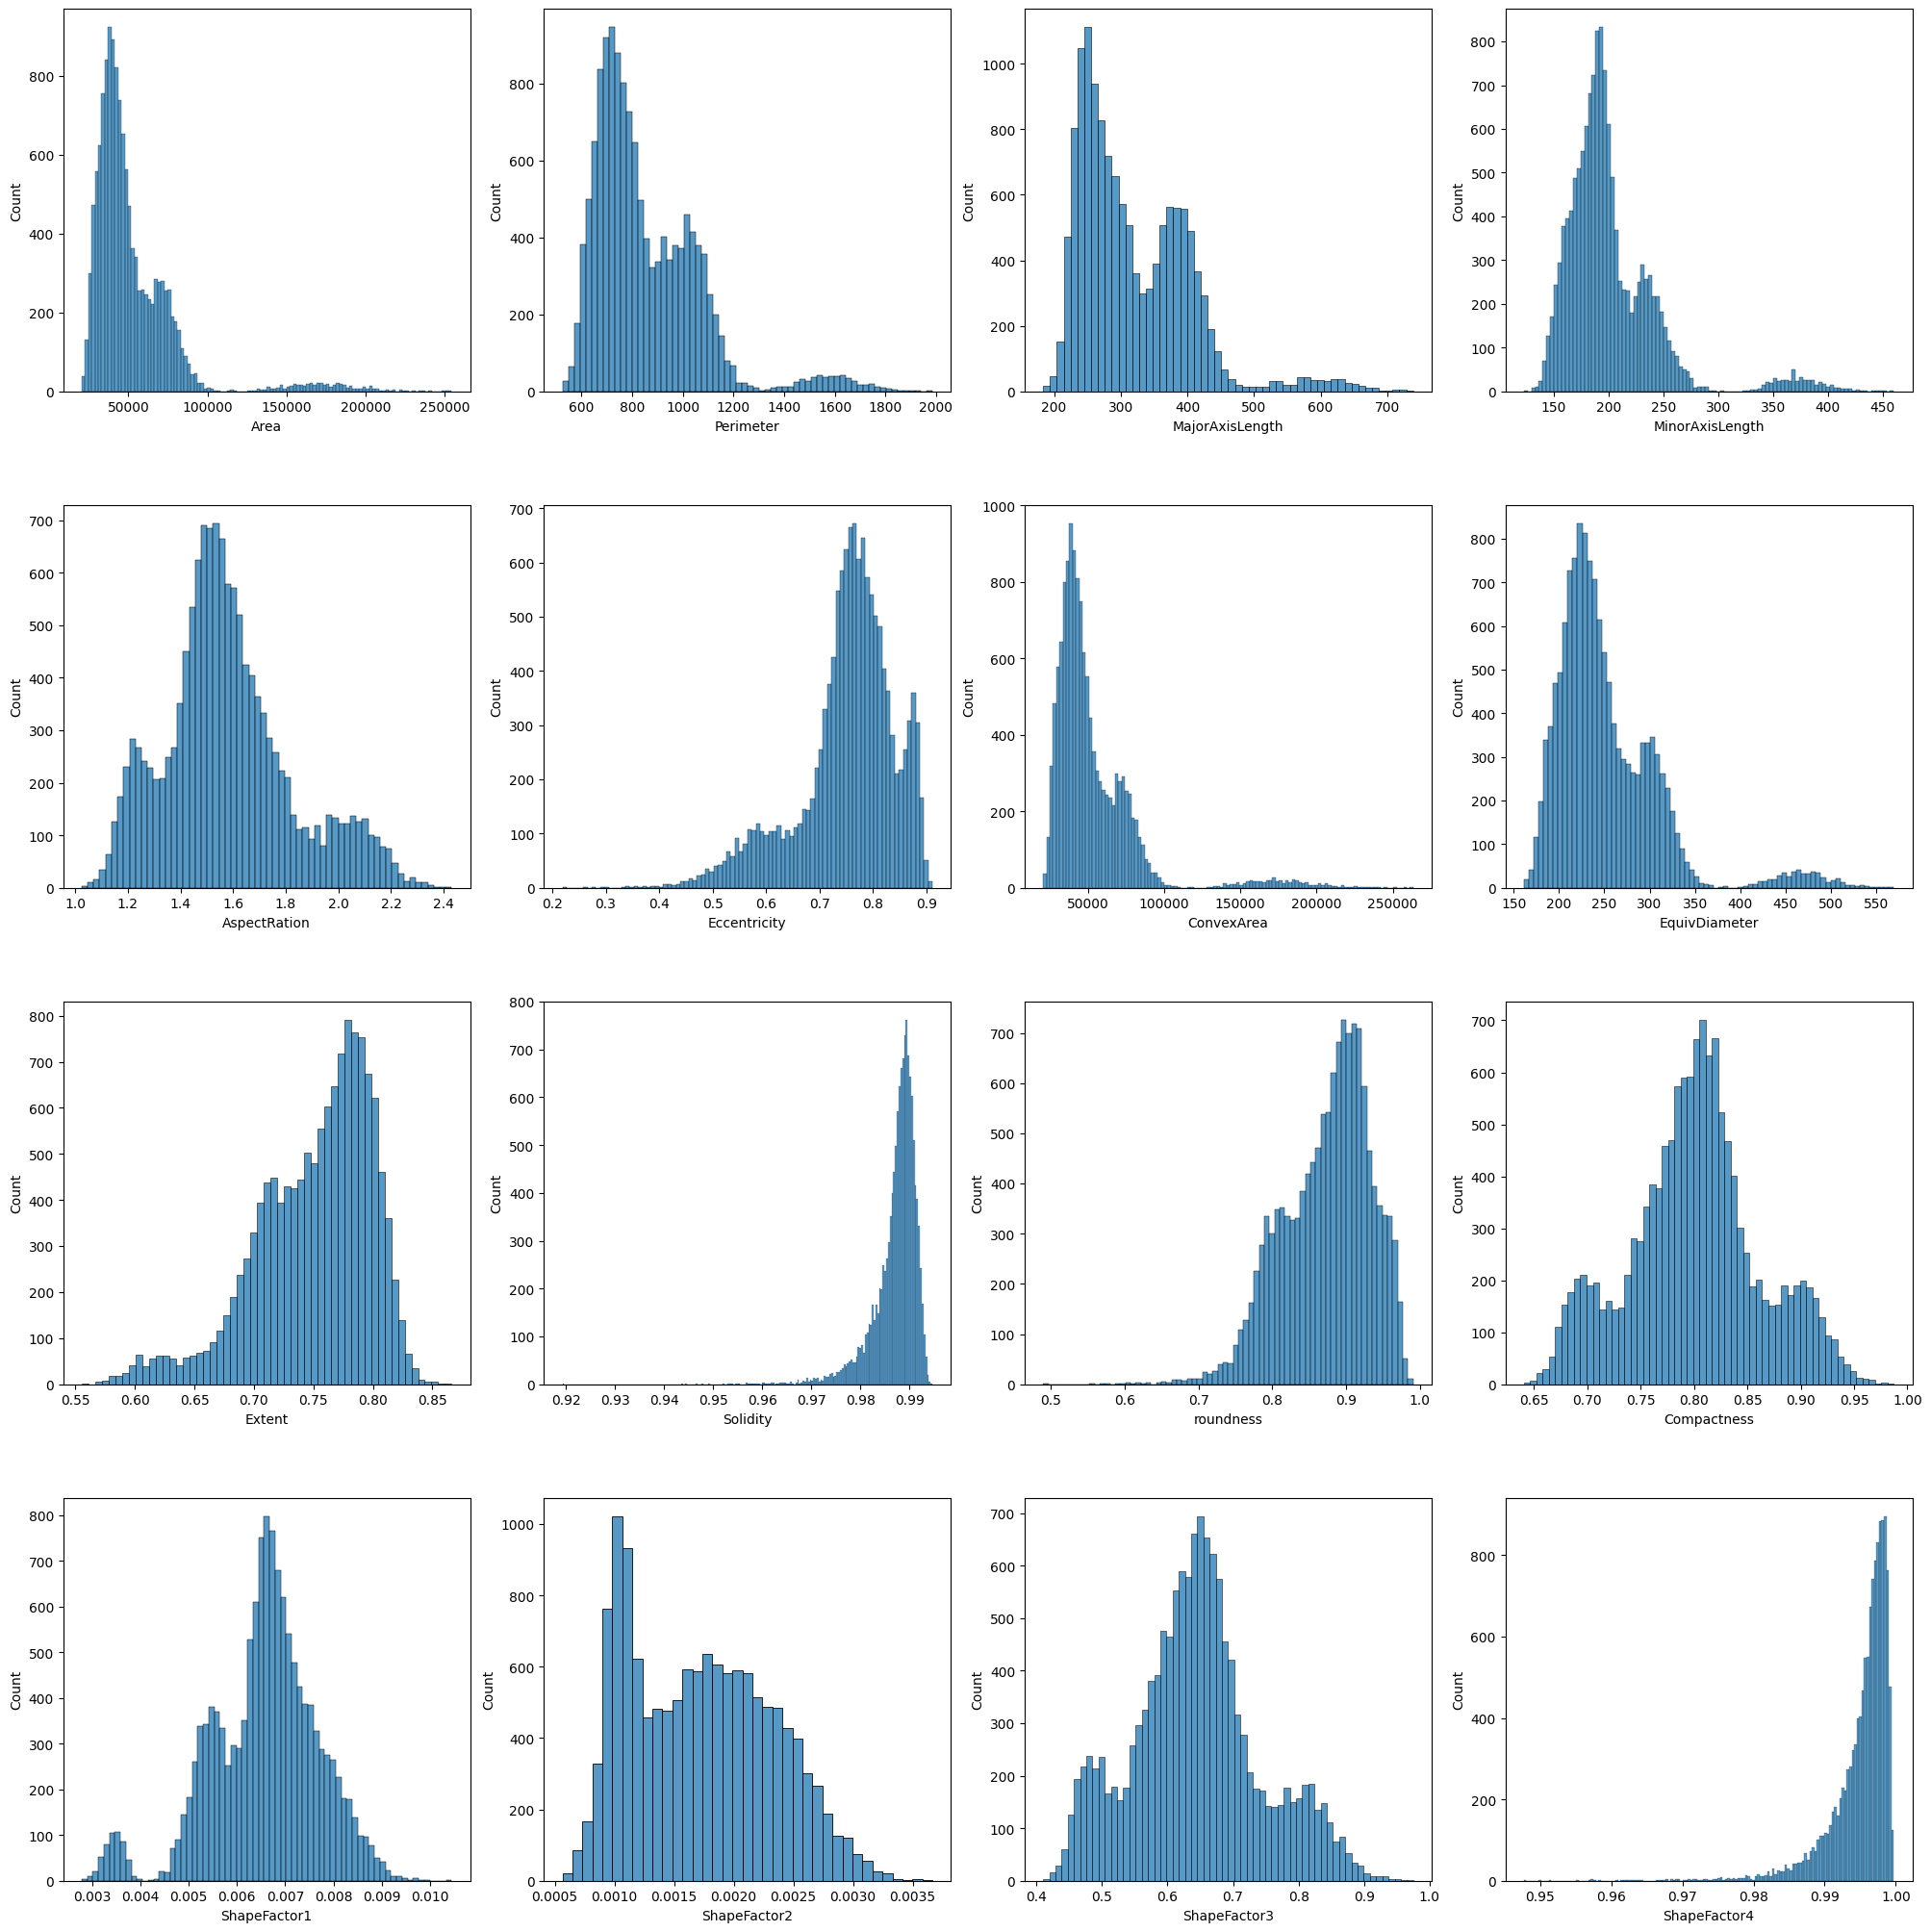

In [282]:
X = data.drop(['Class'], axis=1)
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

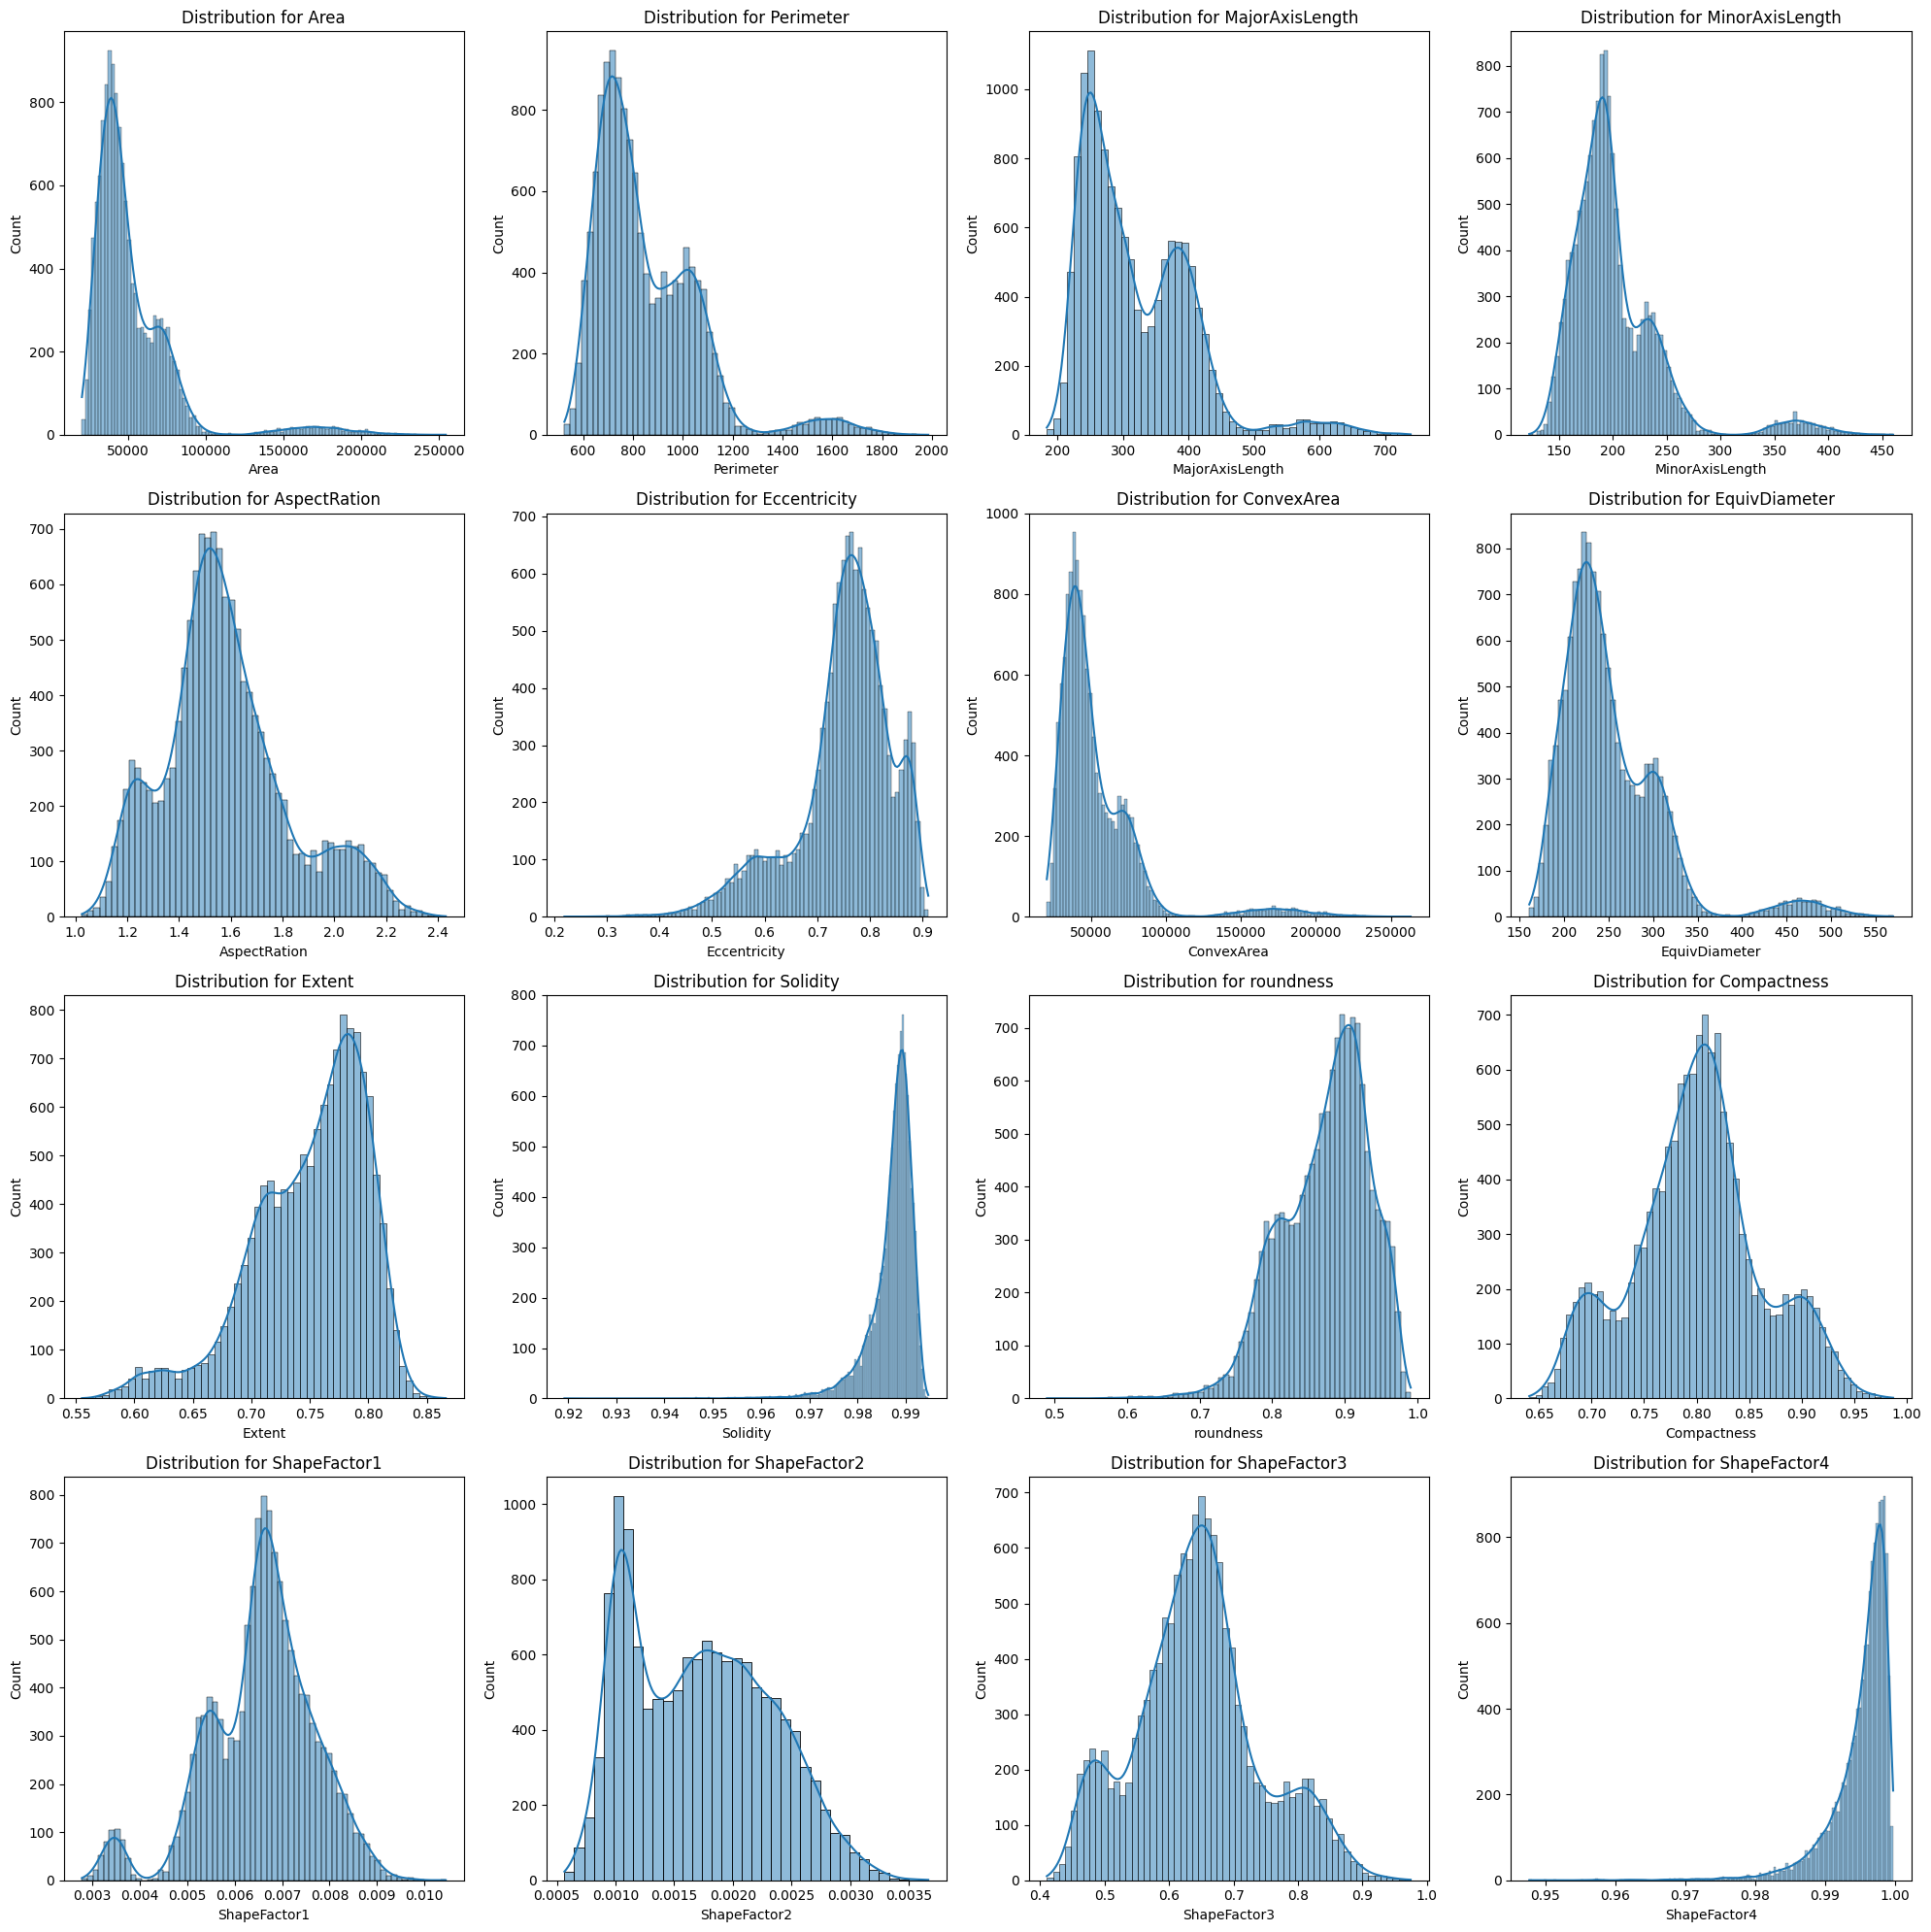

In [283]:
plt.figure(figsize=(20, 20))
columns_to_plot = data.columns[:-1]  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)
    sns.histplot(x=column, data=data, kde=True)
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()

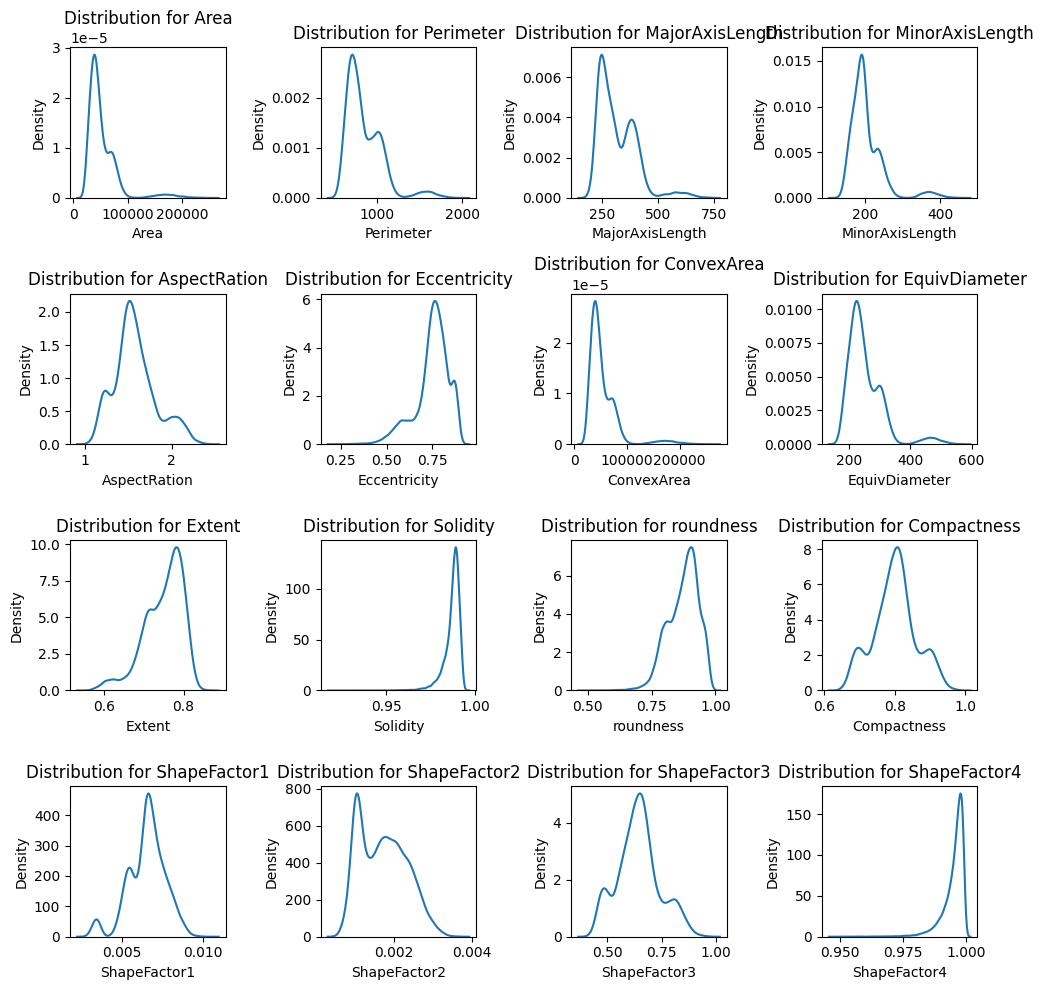

In [284]:
plt.figure(figsize=(10, 10))
columns_to_plot = data.columns[:-1]  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(x=column, data=data)
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()

Iz raspodele zakljucujemo:   

1. Za Area primecuje se desno kosenje asimetricne krive.    
2. Za Perimetar primecuje se desno kosenje asimetricne krive.    
3. Za MajorAxisLength primecuje se bimodalna raspodela sa dva vrha.    
4. Za MinorAxisLength primecuje se desno kosenje asimetricne krive.    
5. Za AspectRatio imamo Poasonovu raspodelu podataka.    
6. Za Eccentricity imamo levo kosenje asimetricne krive.    
7. Za ConvexArea i EquivDiameter imamo desno kosenje asimetricne krive.    
8. Za Extent imamo Poasonovu raspodelu.    
9. Za Solidity imamo eksponencijalnu raspodelu.    
10. Za Roundness imamo levo kosenje asimetricne krive.    
11. Za Compactness imamo normalnu odnosno Gausovu distribuciju    
12. Za ShapeFactor1 imamo bimodalnu raspodelu sa tri vrha.    
12. Za  ShapeFacotr2 imamo bimodalnu raspodelu sa dva vrha     
12. Za ShapeFactori3 imamo Gausovu raspodelu.    
13. Za ShapeFactor4 imamo eksponencijalnu raspodelu.     


__Na osnovu raspodele podataka mozemo izvrsiti odredjene transformacije i dobiti približno normalnu distribuciju. Ove transformacije mogu smanjiti varijabilnost podataka i učiniti ih simetričnijim.__

In [285]:
data.head(n=5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      5  
1     0.953861      0.006979      0.003564      0.909851      0.998430      5  
2     0.908774      0.007244      0.003048      0.825871      0.999066      5  
3     0.928329      0.007017      0.003215      0.861794      0.994199      5  
4     0.970516      0.006697      0.003665      0.941900      0.999166      5

Primenjujemo log transformaciju

In [286]:
X = data.drop(['Class'], axis=1)
col = X.columns

data_log_transformation = pd.DataFrame()
data_log_transformation[col] = np.log1p(data[col])

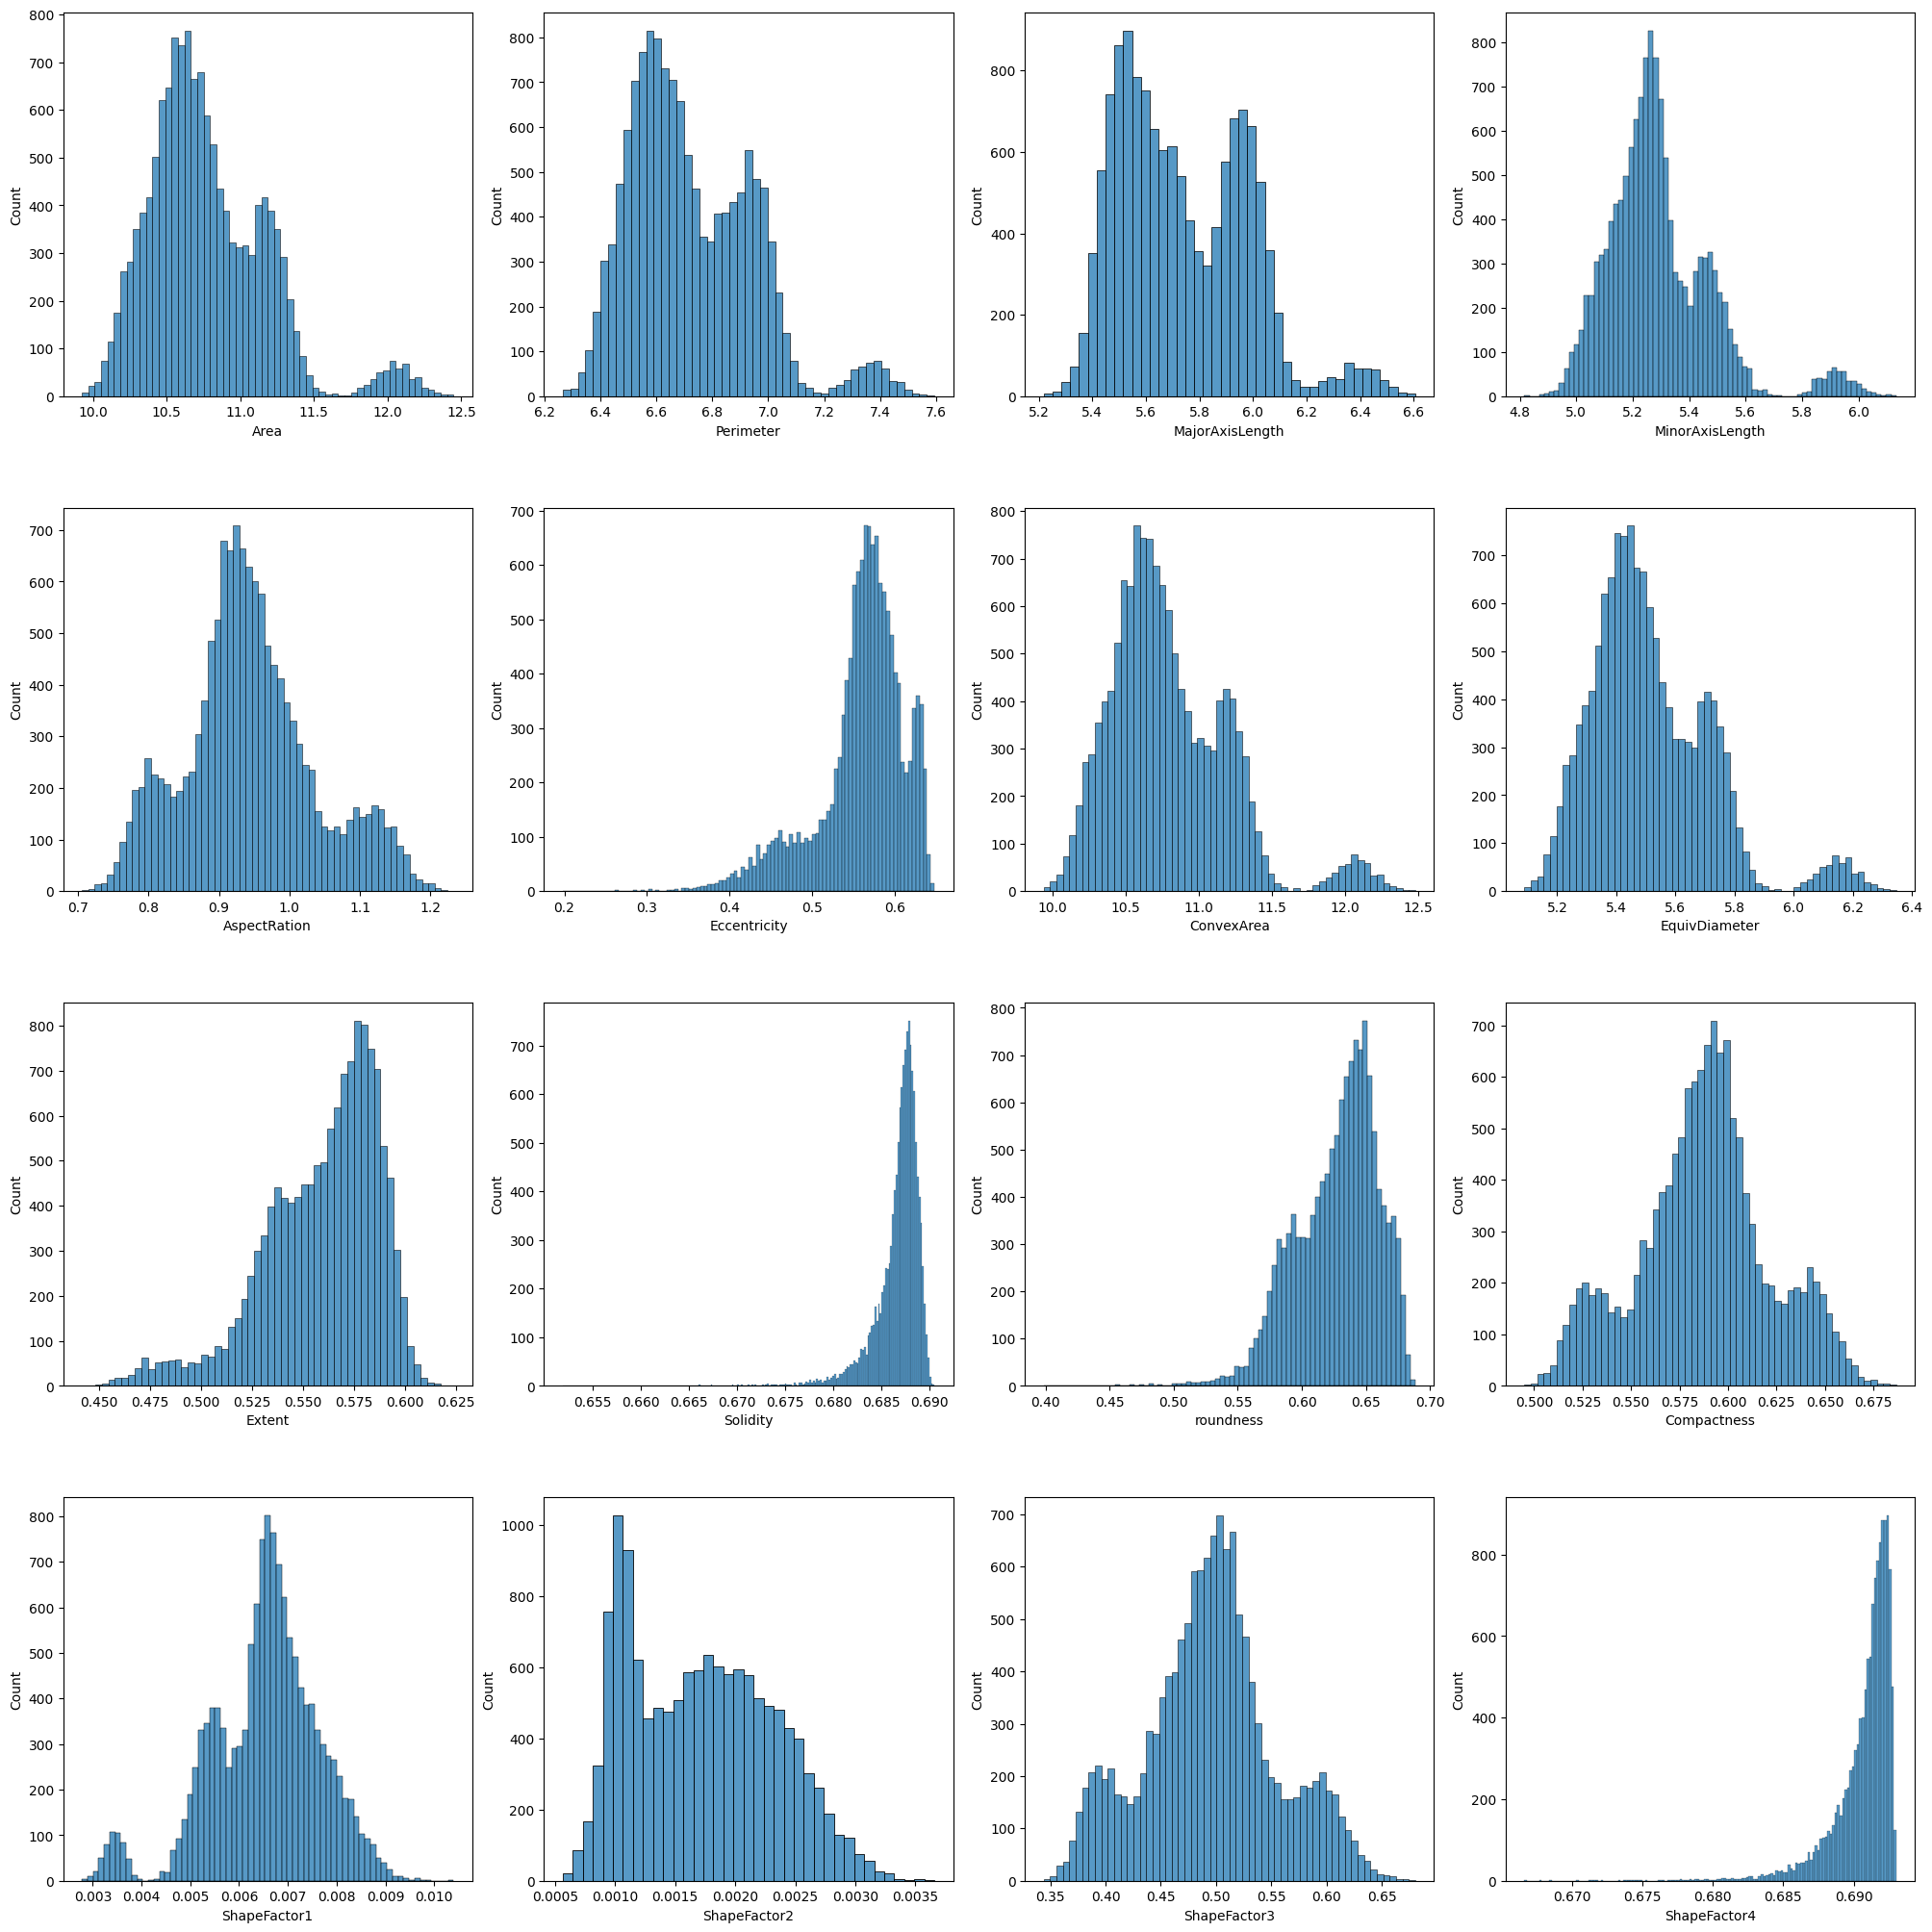

In [287]:
X = data_log_transformation
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

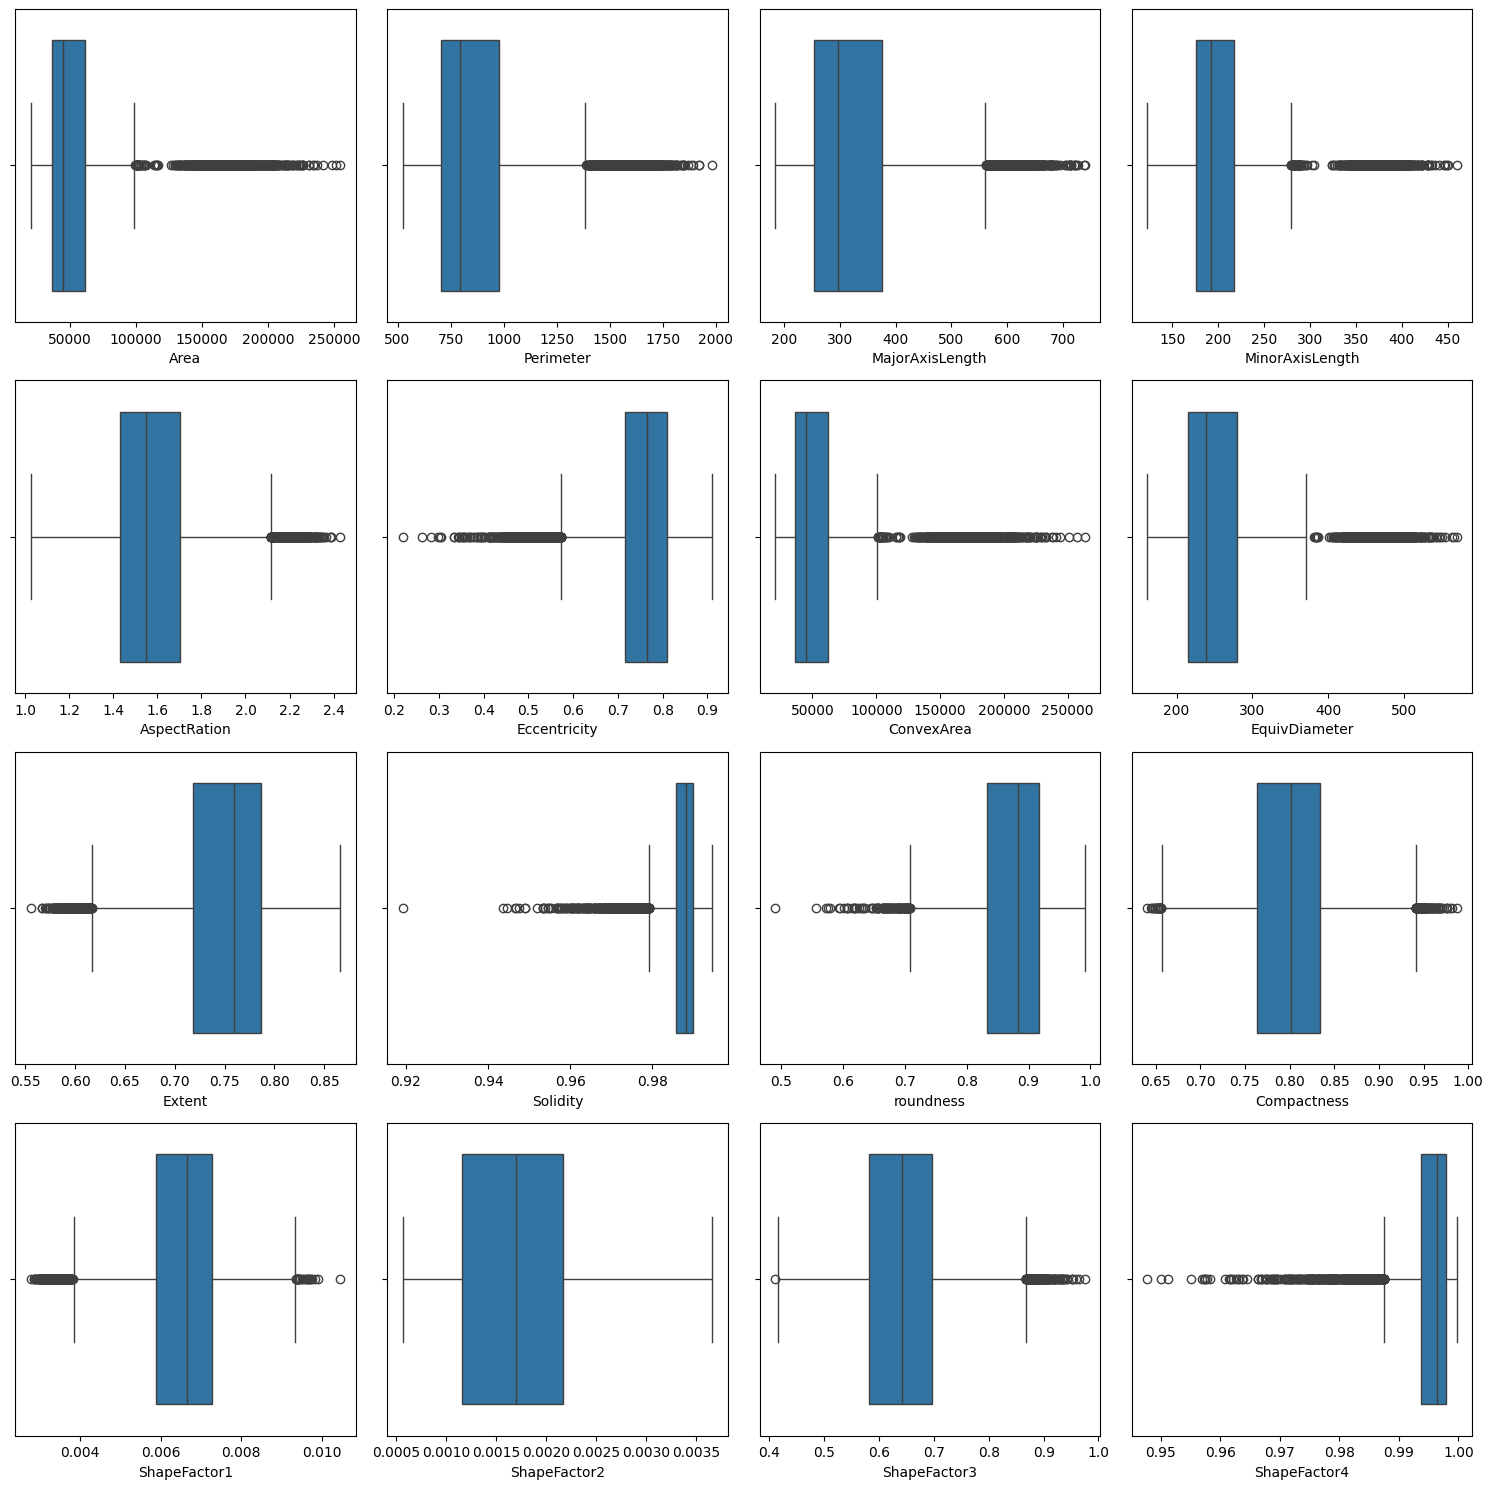

In [288]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(data.columns):
    if column != 'Class' and idx < 17:  
        sns.boxplot(x=data[column], ax=axes[idx])
        
plt.tight_layout()
plt.show()

Na osnovu box plotova mozemo da zakljucimo da u datasetu postoji znacaj broj outliera,otklonicemo ih pomocu IRQ metode.

In [289]:
def remove_outliers(df):
    data_outliers = df.copy()  
    outlier_counts = {}  
    
    for col in df.columns:
        if col != 'Class':
            q25 = np.percentile(df[col], 25)
            q75 = np.percentile(df[col], 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            outliers_removed = (df[col] < lo) | (df[col] > up)
            num_outliers_removed = outliers_removed.sum()
            data_outliers[col] = df[col].clip(upper=up, lower=lo)
            outlier_counts[col] = num_outliers_removed
    
    outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Num_Outliers_Removed'])
    return data_outliers, outlier_df
    

In [290]:
data_outliers, outlier_counts_df = remove_outliers(data)
print("New DataFrame:")
print(data_outliers.head(n=5))
print("\nOutlier Counts:")
print(outlier_counts_df.head())

New DataFrame:
      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.573352     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.573352     29172.0     191.272750  0.783968  0.984986   0.887034   
2      0.573352     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.573352     30724.0     195.467062  0.782681  0.979168   0.903936   
4      0.573352     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0  

### Mere centralne tendencije

In [291]:
data.mean(numeric_only=True)

Area               53048.460385
Perimeter            854.993406
MajorAxisLength      319.895602
MinorAxisLength      202.365321
AspectRation           1.581075
Eccentricity           0.750315
ConvexArea         53767.986709
EquivDiameter        253.034094
Extent                 0.749829
Solidity               0.987152
roundness              0.873671
Compactness            0.800352
ShapeFactor1           0.006561
ShapeFactor2           0.001719
ShapeFactor3           0.644341
ShapeFactor4           0.995078
Class                  3.530311
dtype: float64

Prosečne vrednosti pružaju informaciju o centralnom položaju distribucije podataka. Visoke srednje vrednosti mogu ukazivati na prisustvo ekstremnih vrednosti ili asimetrične distribucije, dok niske srednje vrednosti mogu ukazivati na to da su podaci koncentrisani oko manjih vrednosti.

In [292]:
data.median(numeric_only=True)

Area               44580.000000
Perimeter            793.896000
MajorAxisLength      296.404589
MinorAxisLength      192.491117
AspectRation           1.549860
Eccentricity           0.763997
ConvexArea         45122.000000
EquivDiameter        238.245711
Extent                 0.759903
Solidity               0.988288
roundness              0.883490
Compactness            0.801514
ShapeFactor1           0.006643
ShapeFactor2           0.001700
ShapeFactor3           0.642424
ShapeFactor4           0.996393
Class                  3.000000
dtype: float64

 Ako je medijana bliska srednjoj vrednosti, to može ukazivati na simetričnu distribuciju podataka. Ako je medijana značajno različita od srednje vrednosti, to može ukazivati na asimetriju ili prisustvo ekstremnih vrednosti.

In [293]:
data.mode(axis=0).head(1)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28122.0    683.341       183.601165       122.512653      1.024868   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.218951     37023.0     189.224846  0.692222  0.986995   0.489618   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.640577      0.002778      0.000564      0.410339      0.947687    3.0

Modalne vrednosti su korisne jer pružaju uvid u najčešće vrednosti atributa u datasetu.Ako je vrednost bliska srednjoj vrednosti, to može ukazivati na simetričnu distribuciju podataka. Ako načajno odstupa od srednje vrednosti, to može ukazivati na prisustvo nepravilnosti u distribuciji podataka, poput višestrukih pikova ili asimetrije. 

### Matrica korelacije

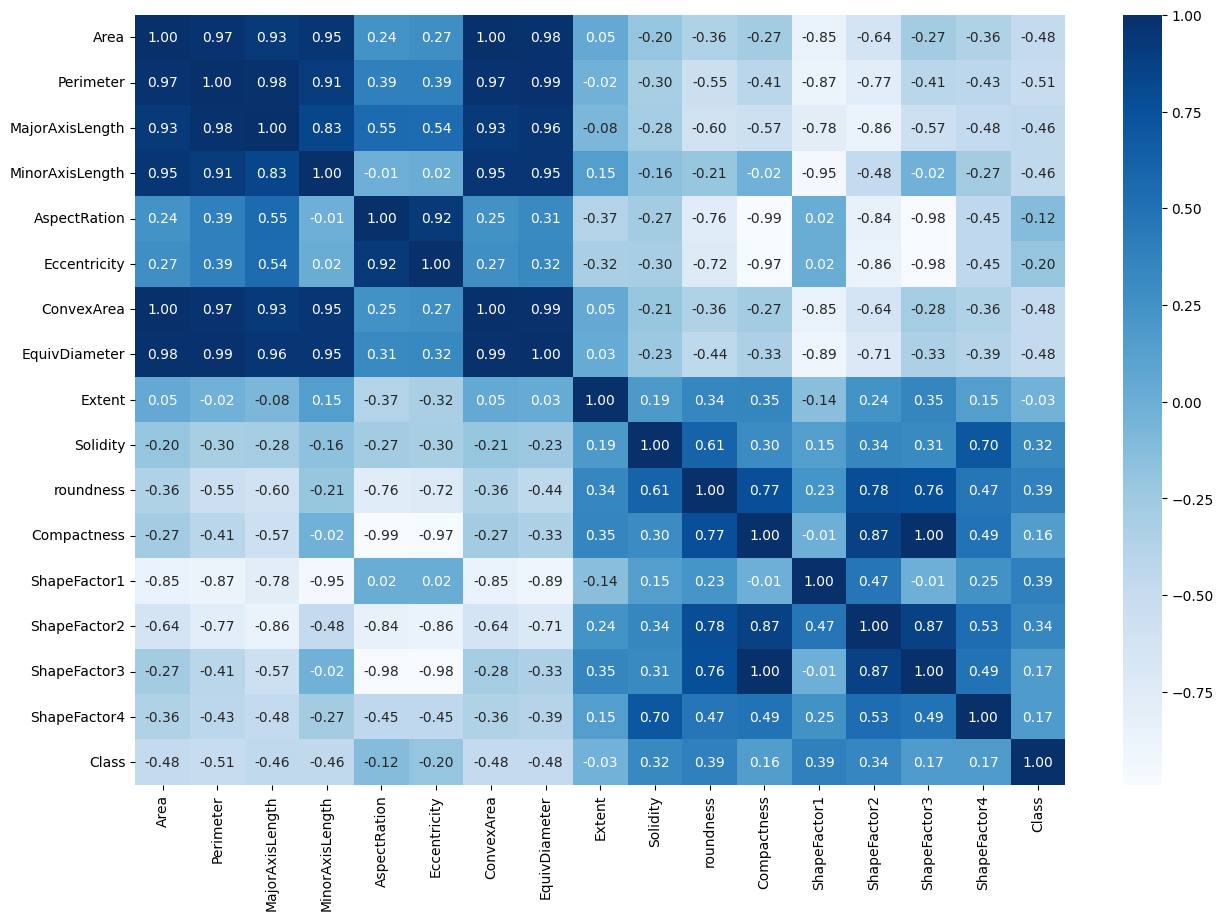

In [294]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data.corr().round(2), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()

Na osnovu matrice korelacije, može se zaključiti da pojedini fičeri imaju medjusobno visok nivo korelacije (Convex Area, Area, Perimeter, MajorAxisLength, MinorAxisLength i EquiDiameter su visoko korelisani fičeri), pa neki od ovih fičera mogu biti uklonjeni.

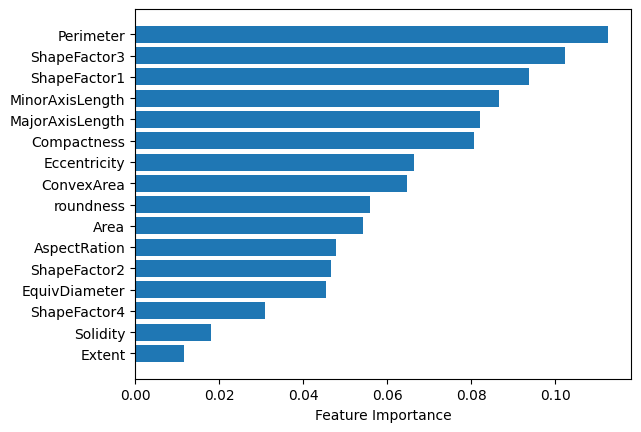

In [295]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = data.drop("Class", axis=1)  
y = data["Class"]

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

In [296]:
columns_to_drop = ['Area', 'EquivDiameter','Eccentricity','ConvexArea']

data_correlation = data.drop(columns=columns_to_drop)

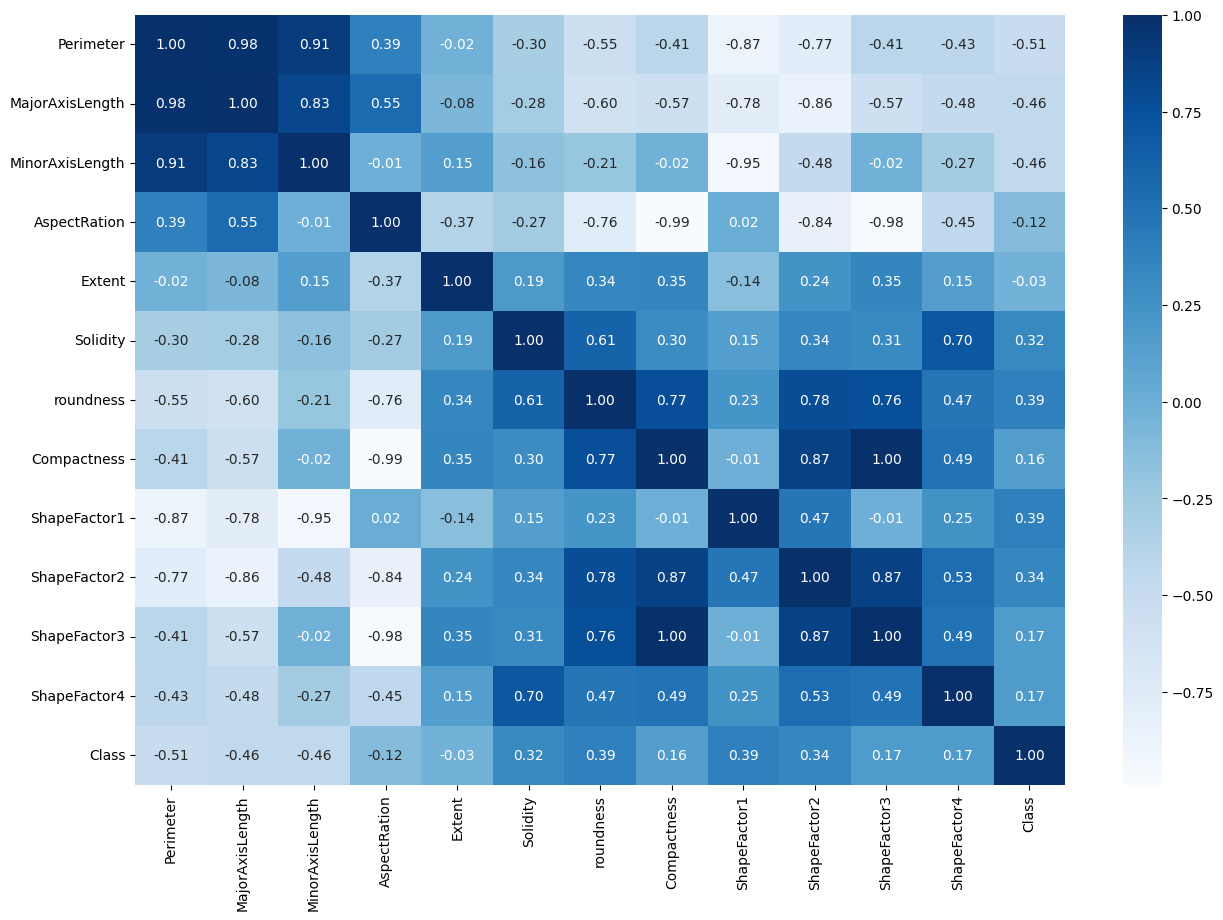

In [297]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data_correlation.corr().round(2), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()

### Varijanska i standardna devijacija

In [298]:
data.var(numeric_only=True).round(2).sort_values()

Extent             0.000000e+00
ShapeFactor2       0.000000e+00
ShapeFactor1       0.000000e+00
Compactness        0.000000e+00
roundness          0.000000e+00
ShapeFactor4       0.000000e+00
Solidity           0.000000e+00
ShapeFactor3       1.000000e-02
Eccentricity       1.000000e-02
AspectRation       6.000000e-02
Class              3.360000e+00
MinorAxisLength    2.029650e+03
EquivDiameter      3.517400e+03
MajorAxisLength    7.363230e+03
Perimeter          4.610583e+04
Area               8.639154e+08
ConvexArea         8.906792e+08
dtype: float64

Kada su vrednosti varijanse _veoma male_ ili blizu nule, to može ukazivati na to da su sve vrednosti u toj koloni praktično iste ili da su veoma slabo varirajuće. Sa druge strane, kada su vrednosti varijanse _veoma velike_, to može ukazivati na veliku raznolikost ili raspršenost podataka u toj koloni.      

In [299]:
data.std(numeric_only=True).round(2).sort_values()

ShapeFactor2           0.00
ShapeFactor1           0.00
ShapeFactor4           0.00
Solidity               0.00
Extent                 0.05
Compactness            0.06
roundness              0.06
Eccentricity           0.09
ShapeFactor3           0.10
AspectRation           0.25
Class                  1.83
MinorAxisLength       45.05
EquivDiameter         59.31
MajorAxisLength       85.81
Perimeter            214.72
Area               29392.44
ConvexArea         29844.25
dtype: float64

___Nulta standardna devijacija___: Za kolone kao što su ShapeFactor2, ShapeFactor1, ShapeFactor4, Solidity, očigledno je da imaju nultu standardnu devijaciju. To znači da sve vrednosti u ovim kolonama imaju istu vrednost, odnosno da nema varijacije u tim podacima. Ove kolone možda nisu korisne za analizu ili modelovanje jer ne doprinose razlikovanju instanci.    

___Veće vrednosti standardne devijacije___: Za kolone poput Perimeter, Area, ConvexArea, MajorAxisLength, EquivDiameter, MinorAxisLength, Class i AspectRation, standardna devijacija je znatno veća. To znači da su vrednosti u ovim kolonama šire raspoređene oko srednje vrednosti, što ukazuje na veću varijabilnost u tim podacima. Ove kolone mogu imati značajnu ulogu u analizi i modelovanju, jer doprinose razlikovanju instanci.

Ovde mozemo da zakljucimo da bi trebalo da izvrsimo i standardizaciju podataka jer može poboljšati performanse algoritama koji su osetljivi na razlike u skalama ili varijansama između atributa i da pored toga izbacimo atribute sa malom standardnom devijacijom.

### Podela podataka na train i test

#### Podela osnovnog skupa podataka

In [300]:
data.head(n=5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      5  
1     0.953861      0.006979      0.003564      0.909851      0.998430      5  
2     0.908774      0.007244      0.003048      0.825871      0.999066      5  
3     0.928329      0.007017      0.003215      0.861794      0.994199      5  
4     0.970516      0.006697      0.003665      0.941900      0.999166      5

In [301]:
data1=data.values
X=data1[:,0:16]
y=data1[:,16]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 9480
Broj uzoraka u test skupu podataka: 4063


##### SVC algoritam

              precision    recall  f1-score   support

         0.0       0.42      0.05      0.09       410
         1.0       1.00      1.00      1.00       152
         2.0       0.59      0.88      0.71       494
         3.0       0.77      0.88      0.82      1031
         4.0       0.60      0.61      0.60       560
         5.0       0.46      0.26      0.33       630
         6.0       0.56      0.73      0.64       786

    accuracy                           0.64      4063
   macro avg       0.63      0.63      0.60      4063
weighted avg       0.61      0.64      0.60      4063



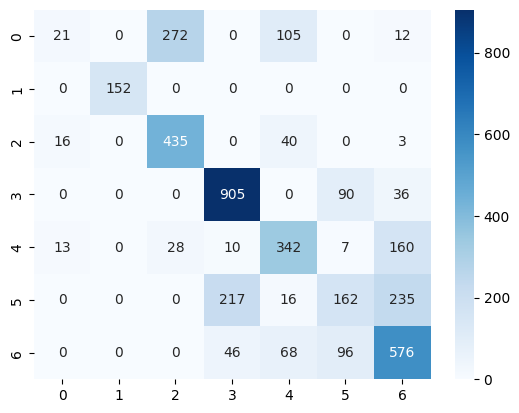

In [302]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       410
         1.0       1.00      1.00      1.00       152
         2.0       0.93      0.94      0.94       494
         3.0       0.90      0.93      0.92      1031
         4.0       0.96      0.95      0.95       560
         5.0       0.96      0.93      0.95       630
         6.0       0.88      0.87      0.87       786

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



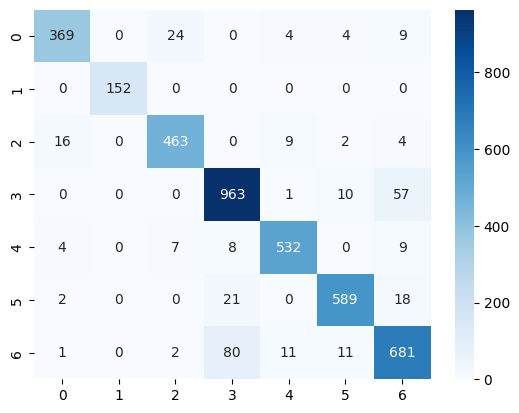

In [303]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

#### Podela skupa na osnovu balansiranosti dataseta

In [304]:
balanced_df.head(n=5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  46278    846.308       300.630215       196.478444      1.530093   
1  47668    846.128       300.107152       202.881161      1.479226   
2  49755    868.813       332.091111       191.992082      1.729713   
3  51512    887.745       276.657322       237.613608      1.164316   
4  51674    910.012       318.885857       206.966320      1.540762   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.756879       47102     242.740560  0.790996  0.982506   0.811947   
1      0.736875       48450     246.359052  0.814754  0.983860   0.836690   
2      0.815944       50783     251.694326  0.734283  0.979757   0.828312   
3      0.512188       52436     256.099815  0.742120  0.982379   0.821376   
4      0.760763       52718     256.502203  0.797721  0.980197   0.784129   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.807439      0.006496      0.001703      0.651958      0.997556      0  
1     0.820904      0.006296      0.001764      0.673883      0.996825      0  
2     0.757907      0.006675      0.001359      0.574424      0.993588      0  
3     0.925693      0.005371      0.002433      0.856908      0.997712      0  
4     0.804370      0.006171      0.001594      0.647011      0.996890      0

In [305]:
data1=balanced_df.values
X=data1[:,0:16]
y1=data1[:,16]
x_train,x_test,y_train,y_test=train_test_split(X,y1,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 12204
Broj uzoraka u test skupu podataka: 5231


##### SVC

              precision    recall  f1-score   support

         0.0       0.55      0.48      0.51       643
         1.0       1.00      1.00      1.00      1073
         2.0       0.67      0.70      0.69       689
         3.0       0.92      0.88      0.90       715
         4.0       0.71      0.76      0.73       727
         5.0       0.71      0.74      0.73       743
         6.0       0.65      0.66      0.65       641

    accuracy                           0.77      5231
   macro avg       0.74      0.75      0.74      5231
weighted avg       0.77      0.77      0.77      5231



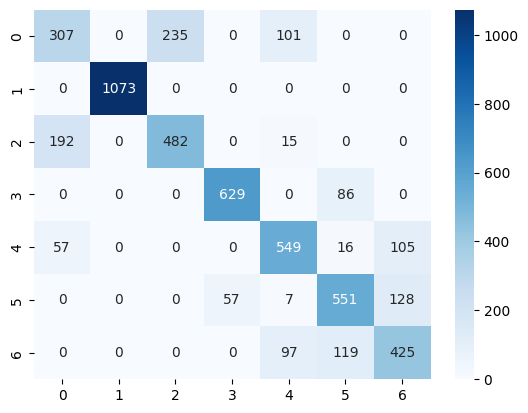

In [306]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       643
         1.0       1.00      1.00      1.00      1073
         2.0       0.99      0.98      0.98       689
         3.0       0.99      0.99      0.99       715
         4.0       0.99      0.99      0.99       727
         5.0       0.99      0.99      0.99       743
         6.0       0.99      0.99      0.99       641

    accuracy                           0.99      5231
   macro avg       0.99      0.99      0.99      5231
weighted avg       0.99      0.99      0.99      5231



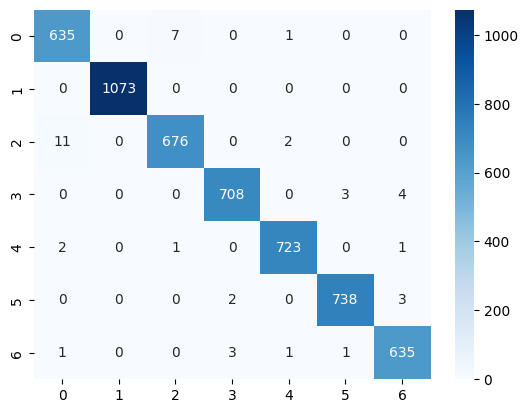

In [307]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

#### Podela skupa na osnovu raspodele podataka

In [308]:
data_log_transformation.head(n=5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  10.254004   6.415573         5.343186         5.164150      0.787180   
1  10.265871   6.459933         5.305912         5.213491      0.740678   
2  10.288103   6.437928         5.365163         5.175761      0.792862   
3  10.309253   6.472167         5.354499         5.212305      0.767159   
4  10.313642   6.431547         5.312456         5.253735      0.723093   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.438134   10.265210       5.253012  0.567540  0.687560   0.671937   
1      0.344855   10.280999       5.258915  0.578840  0.685612   0.635006   
2      0.446433   10.298599       5.269974  0.575553  0.687913   0.666726   
3      0.404542   10.332832       5.280495  0.578119  0.681427   0.643924   
4      0.287942   10.322790       5.282678  0.572728  0.688583   0.685557   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.648860      0.007305      0.003142      0.606621      0.692509  
1     0.669807      0.006954      0.003557      0.647025      0.692362  
2     0.646461      0.007218      0.003043      0.602057      0.692680  
3     0.656654      0.006992      0.003209      0.621541      0.690242  
4     0.678295      0.006675      0.003658      0.663667      0.692730

In [309]:
data2=data_log_transformation.values
X=data2[:,0:16]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 9480
Broj uzoraka u test skupu podataka: 4063


##### SVC

              precision    recall  f1-score   support

         0.0       0.78      0.02      0.03       406
         1.0       1.00      1.00      1.00       149
         2.0       0.57      0.95      0.71       495
         3.0       0.84      0.89      0.86      1078
         4.0       0.85      0.78      0.82       524
         5.0       0.98      0.62      0.76       625
         6.0       0.65      0.89      0.75       786

    accuracy                           0.76      4063
   macro avg       0.81      0.73      0.70      4063
weighted avg       0.79      0.76      0.72      4063



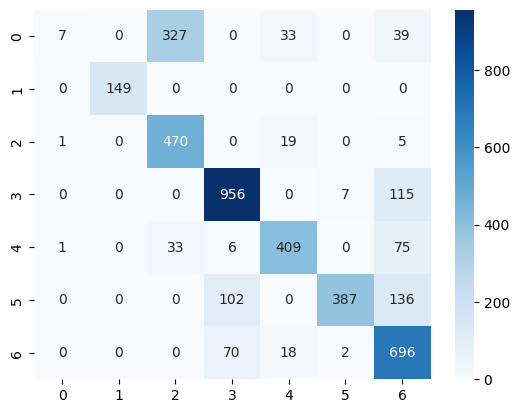

In [310]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest


              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       406
         1.0       1.00      1.00      1.00       149
         2.0       0.93      0.93      0.93       495
         3.0       0.91      0.91      0.91      1078
         4.0       0.95      0.94      0.94       524
         5.0       0.95      0.96      0.96       625
         6.0       0.86      0.86      0.86       786

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



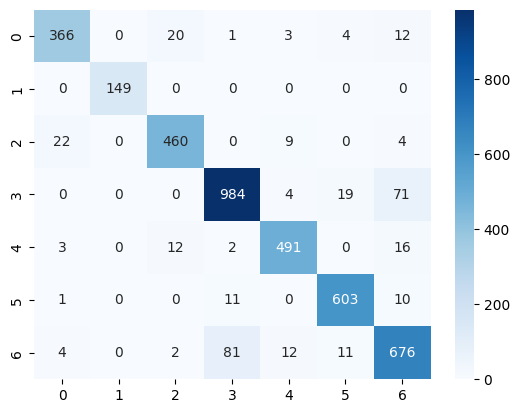

In [311]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

#### Podela skupa na osnovu outliera

In [312]:
data_outliers.head(n=5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.573352     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.573352     29172.0     191.272750  0.783968  0.984986   0.887034   
2      0.573352     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.573352     30724.0     195.467062  0.782681  0.979168   0.903936   
4      0.573352     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      5  
1     0.941333      0.006979      0.003564      0.867076      0.998430      5  
2     0.908774      0.007244      0.003048      0.825871      0.999066      5  
3     0.928329      0.007017      0.003215      0.861794      0.994199      5  
4     0.941333      0.006697      0.003665      0.867076      0.999166      5

In [313]:
data3=data_outliers.values
X=data3[:,0:16]
y=data3[:,16]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 9480
Broj uzoraka u test skupu podataka: 4063


##### SVC

              precision    recall  f1-score   support

         0.0       0.34      0.06      0.11       391
         1.0       0.87      1.00      0.93       149
         2.0       0.58      0.83      0.68       480
         3.0       0.77      0.85      0.81      1054
         4.0       0.61      0.55      0.58       590
         5.0       0.40      0.25      0.31       600
         6.0       0.56      0.75      0.64       799

    accuracy                           0.63      4063
   macro avg       0.59      0.61      0.58      4063
weighted avg       0.59      0.63      0.59      4063



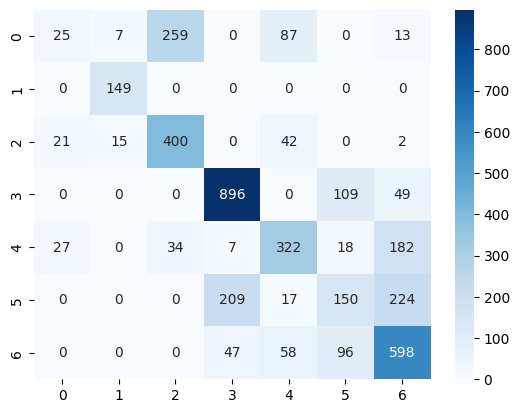

In [314]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       391
         1.0       1.00      1.00      1.00       149
         2.0       0.94      0.92      0.93       480
         3.0       0.90      0.92      0.91      1054
         4.0       0.95      0.95      0.95       590
         5.0       0.95      0.94      0.95       600
         6.0       0.86      0.87      0.86       799

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



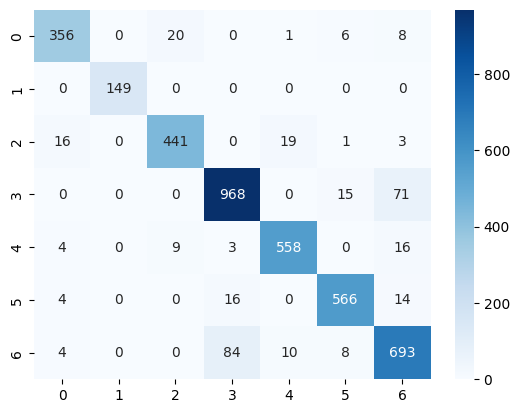

In [315]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

#### Podela skupa na osnovu matrice korelacije

In [316]:
data_correlation.head(n=5)

Perimeter  MajorAxisLength  MinorAxisLength  AspectRation    Extent  \
0    610.291       208.178117       173.888747      1.197191  0.763923   
1    638.018       200.524796       182.734419      1.097356  0.783968   
2    624.110       212.826130       175.931143      1.209713  0.778113   
3    645.884       210.557999       182.516516      1.153638  0.782681   
4    620.134       201.847882       190.279279      1.060798  0.773098   

   Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
0  0.988856   0.958027     0.913358      0.007332      0.003147      0.834222   
1  0.984986   0.887034     0.953861      0.006979      0.003564      0.909851   
2  0.989559   0.947849     0.908774      0.007244      0.003048      0.825871   
3  0.976696   0.903936     0.928329      0.007017      0.003215      0.861794   
4  0.990893   0.984877     0.970516      0.006697      0.003665      0.941900   

   ShapeFactor4  Class  
0      0.998724      5  
1      0.998430      5  
2      0.999066      5  
3      0.994199      5  
4      0.999166      5

In [317]:
data4=data_correlation.values
X=data4[:,0:12]
y=data4[:,12]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 9480
Broj uzoraka u test skupu podataka: 4063


##### SVC

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83       397
         1.0       0.99      1.00      1.00       161
         2.0       0.82      0.95      0.88       483
         3.0       0.92      0.90      0.91      1092
         4.0       0.93      0.85      0.89       581
         5.0       0.93      0.90      0.91       568
         6.0       0.77      0.87      0.82       781

    accuracy                           0.88      4063
   macro avg       0.90      0.89      0.89      4063
weighted avg       0.89      0.88      0.88      4063



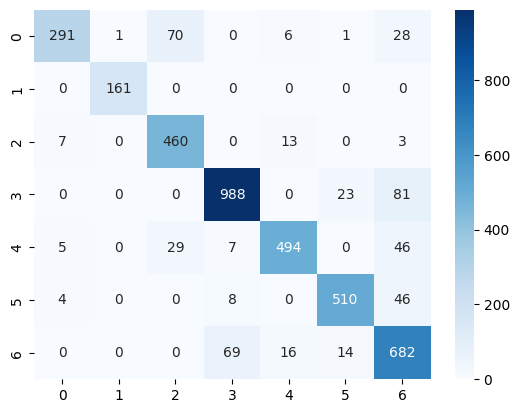

In [318]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       397
         1.0       0.99      1.00      1.00       161
         2.0       0.95      0.96      0.95       483
         3.0       0.92      0.92      0.92      1092
         4.0       0.96      0.95      0.96       581
         5.0       0.92      0.95      0.93       568
         6.0       0.87      0.87      0.87       781

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



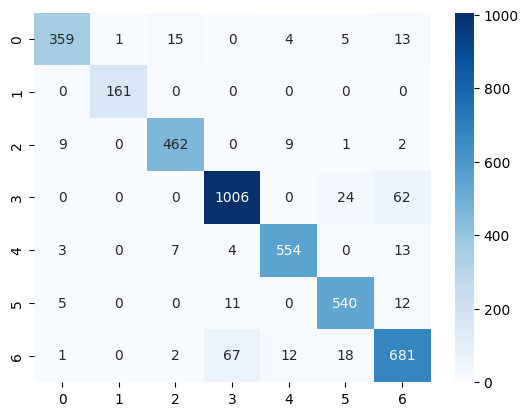

In [319]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

### Tabela sa rezultatima

|     Tip podele     |SVC accuracy     |Random Forest accuracy|
|:------------------:|:-------:|:-----------:|
|     Osnovni skup   |    0.64     |   0.92          |        
|     Balansirani    |    0.77     |   0.99        |        
| Raspodela podataka |     0.76   |     0.92        |        
|     Outlieri       |     0.63    |     0.92       |                
|     Korelacija     |     0.88    |      0.93       |              

## Drugi dataset

Dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

11 integer atributa: age,balance,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed   
5 kategoricka atributa: job,marital,education,contact,poutcome	       
4 binarna atributa: default,housing,loan,y     
2 date atributa: month,day_of_week    

### Deskriptivna analiza

In [320]:
data2 = pd.read_csv('bank-additional-full.csv', sep=';')

In [321]:
print("Shape:",data2.shape) 
data2.head(10)

Shape: (41188, 21)


age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

In [322]:
data2.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Primecujemo da imamo dosta kategorickih atributa.

In [323]:
data2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [324]:
numerical = ['duration', 'campaign', 'pdays', 'previous', 'age',
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

objects = ['marital', 'education', 'housing', 'default', 'loan',
           'contact', 'month', 'day_of_week', 'poutcome', 'job']

In [325]:
dupl = data2.duplicated()
print("Broj duplikata pre brisanja:", dupl.sum())
data2.drop_duplicates(inplace=True)
print("Broj duplikata posle brisanja:", data2.duplicated().sum())

Broj duplikata pre brisanja: 12
Broj duplikata posle brisanja: 0


In [326]:
data2.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

### Raspodela podataka

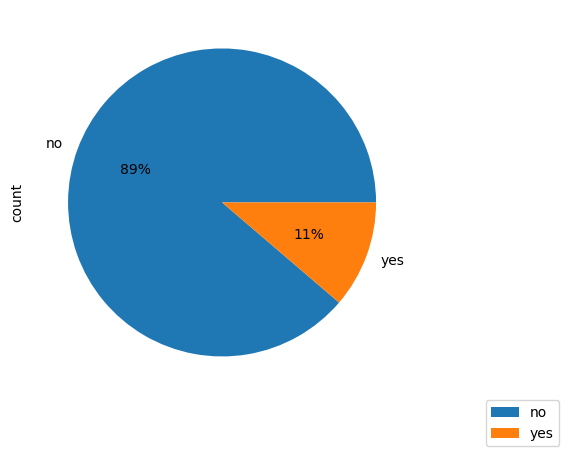

In [327]:
plt.figure(figsize=(7, 5))
pie = data2.y.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()

Primećujemo da je dataset veoma loše balansiran sa mnogo većim brojem primeraka koji pripadaju klasi no. Na osnovu ovoga možemo pretpostaviti da će verovatno biti potrebno korišćenje neke od dostupnih tehnika kojom će se izvršiti balansiranje dataseta.

__Vizualizacija raspodele kategorickih atributa__ :

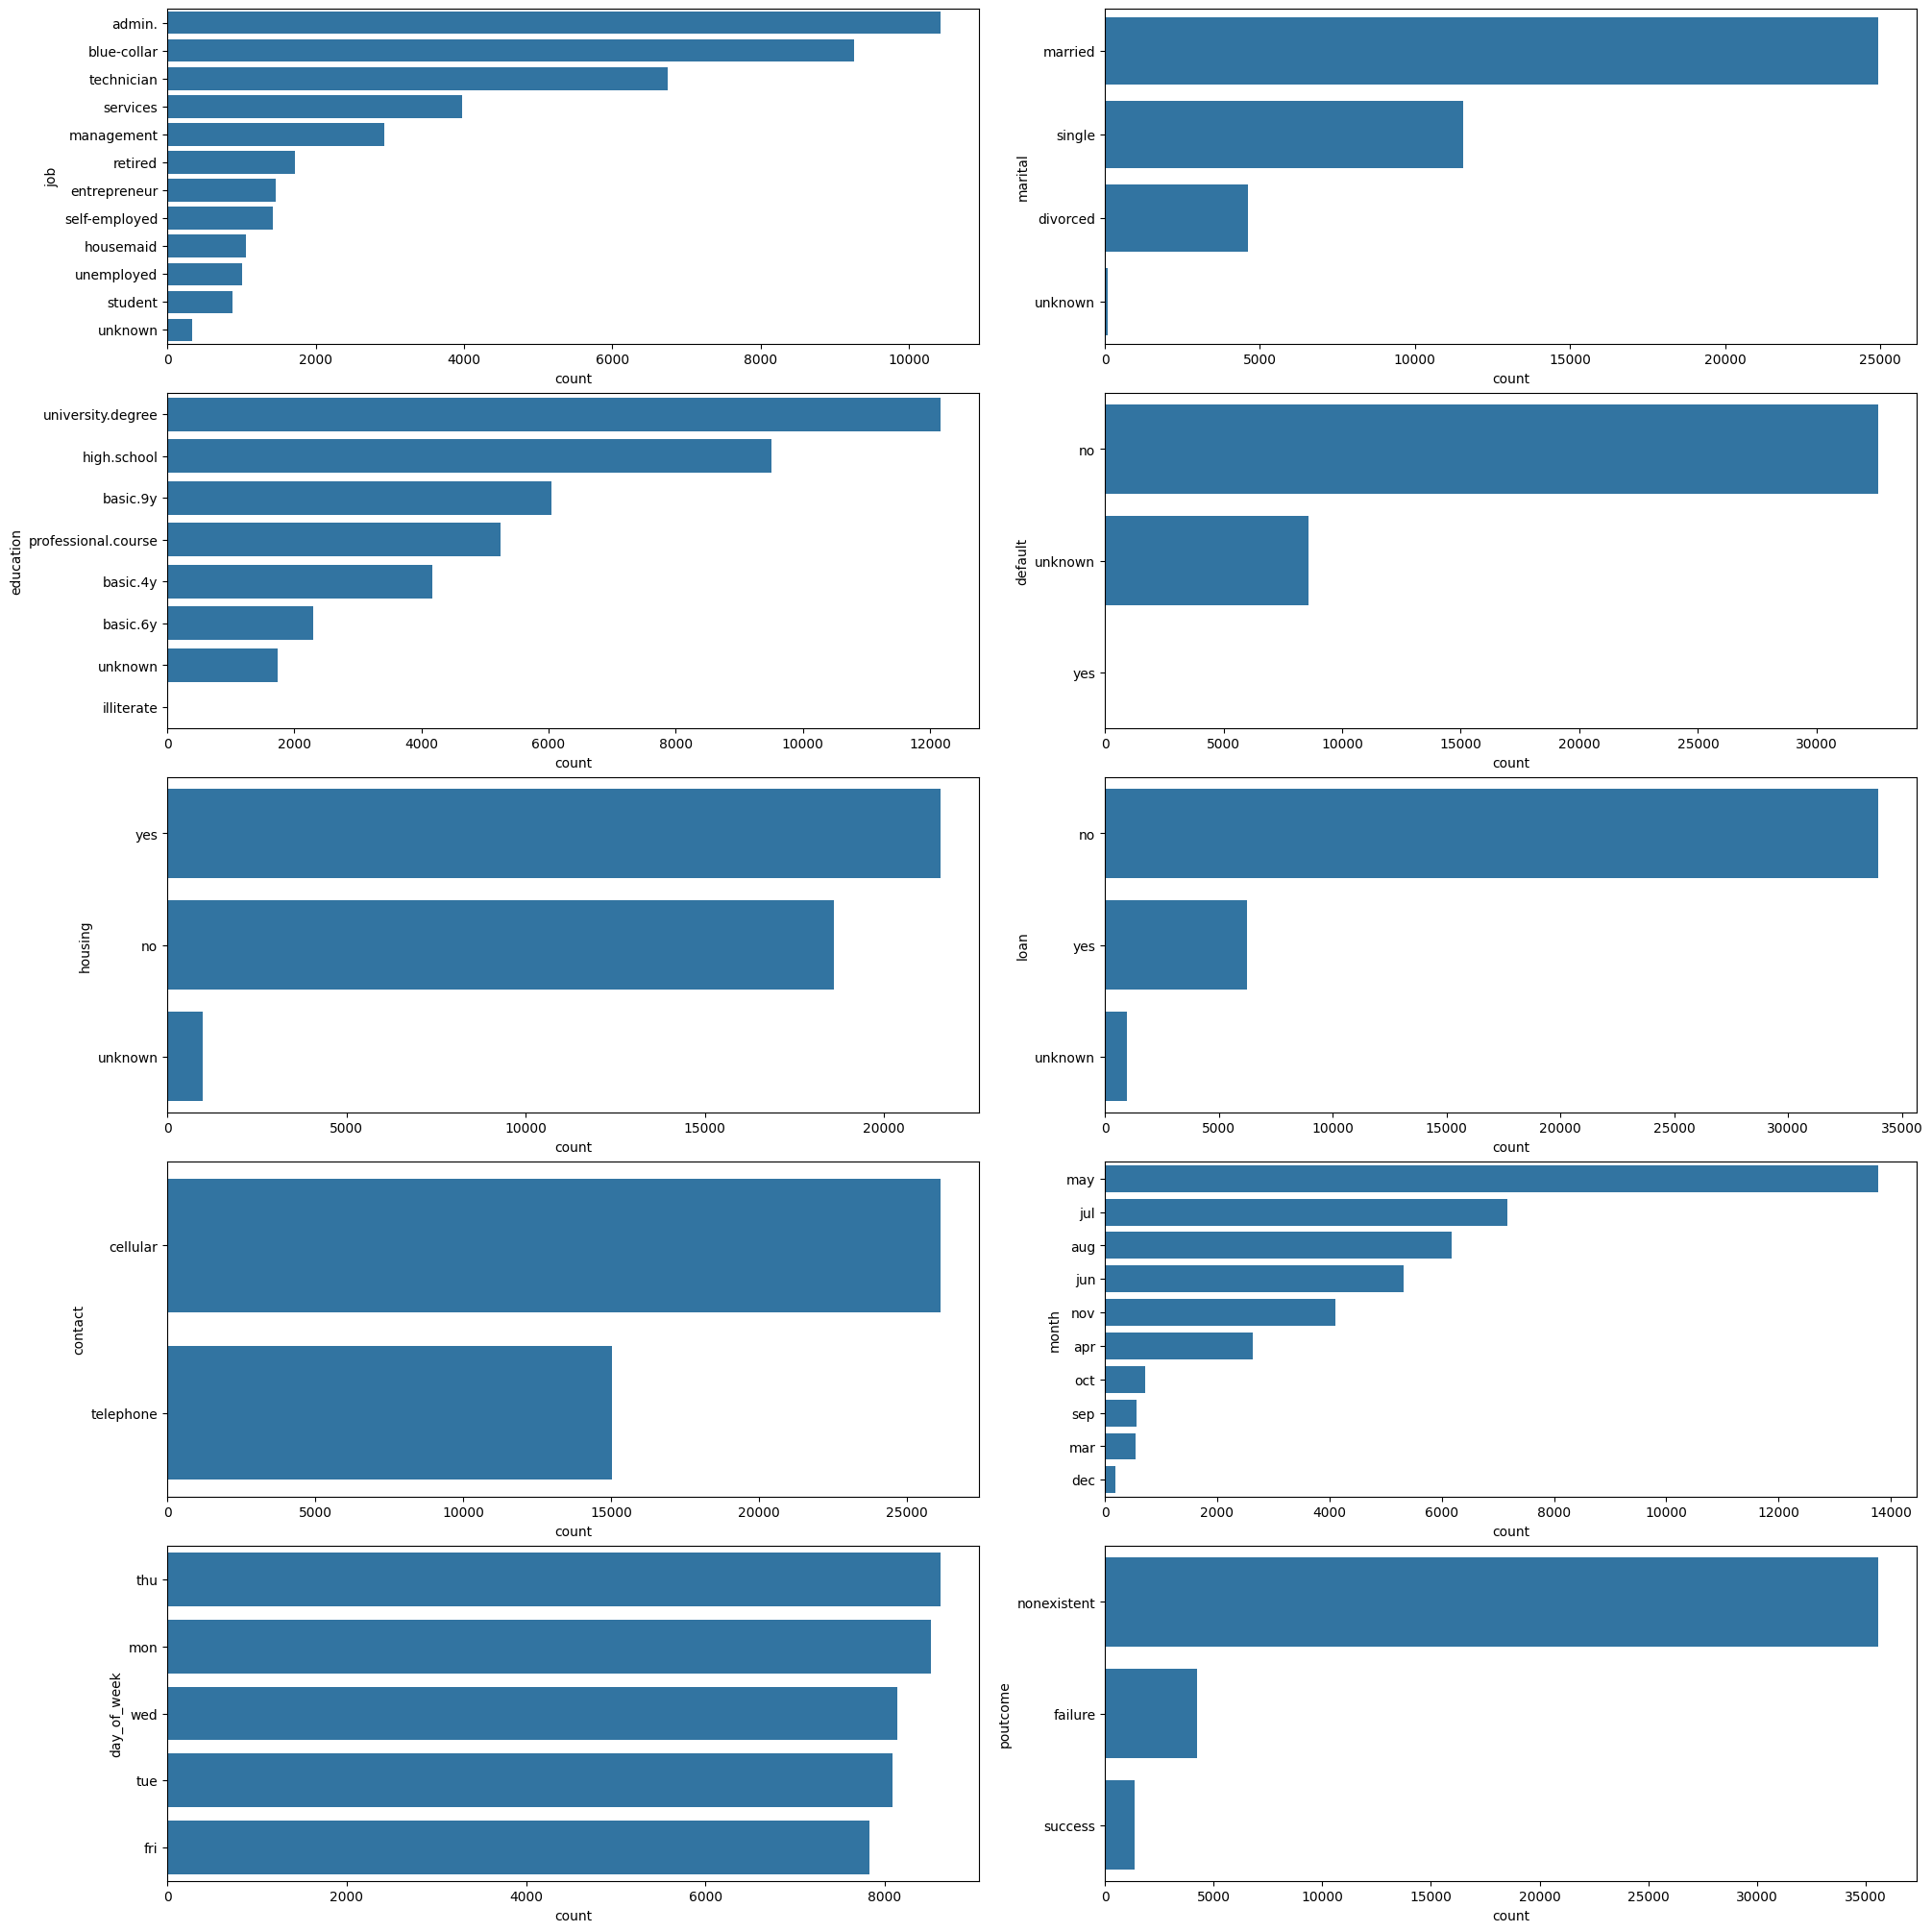

In [328]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
categorical = data2.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical[:-1]):
    sns.countplot(y=f, data=data2,
                  ax=axs[i//2][i % 2],
                  order=data2[f].value_counts().index)

Na osnovu histograma se može zaključiti da neke od kolona sadrže veoma mali broj primeraka određenih vrednosti kao i nedostajuće vrednosti. U nastavku možemo proveriti koliko tačno ovakvih vrednosti ima.

In [329]:
columns_with_unknown = ['job', 'housing',
                        'loan', 'default', 'marital', 'education']

for val in columns_with_unknown:
    print(f'Column {val}: \n')
    print((data2.groupby(val).size()/data2[val].count())*100)

Column job: 

job
admin.           25.303575
blue-collar      22.471828
entrepreneur      3.536040
housemaid         2.574315
management        7.101224
retired           4.172333
self-employed     3.451039
services          9.634253
student           2.125024
technician       16.366330
unemployed        2.462600
unknown           0.801438
dtype: float64
Column housing: 

housing
no         45.208374
unknown     2.404313
yes        52.387313
dtype: float64
Column loan: 

loan
no         82.421799
unknown     2.404313
yes        15.173888
dtype: float64
Column default: 

default
no         79.116476
unknown    20.876239
yes         0.007286
dtype: float64
Column marital: 

marital
divorced    11.198271
married     60.523120
single      28.084321
unknown      0.194288
dtype: float64
Column education: 

education
basic.4y               10.141830
basic.6y                5.563921
basic.9y               14.680882
high.school            23.100835
illiterate              0.043715
professional.

Zatim, možemo izvršiti vizuelizaciju raspodele vrednosti unutar numeričkih kolona

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

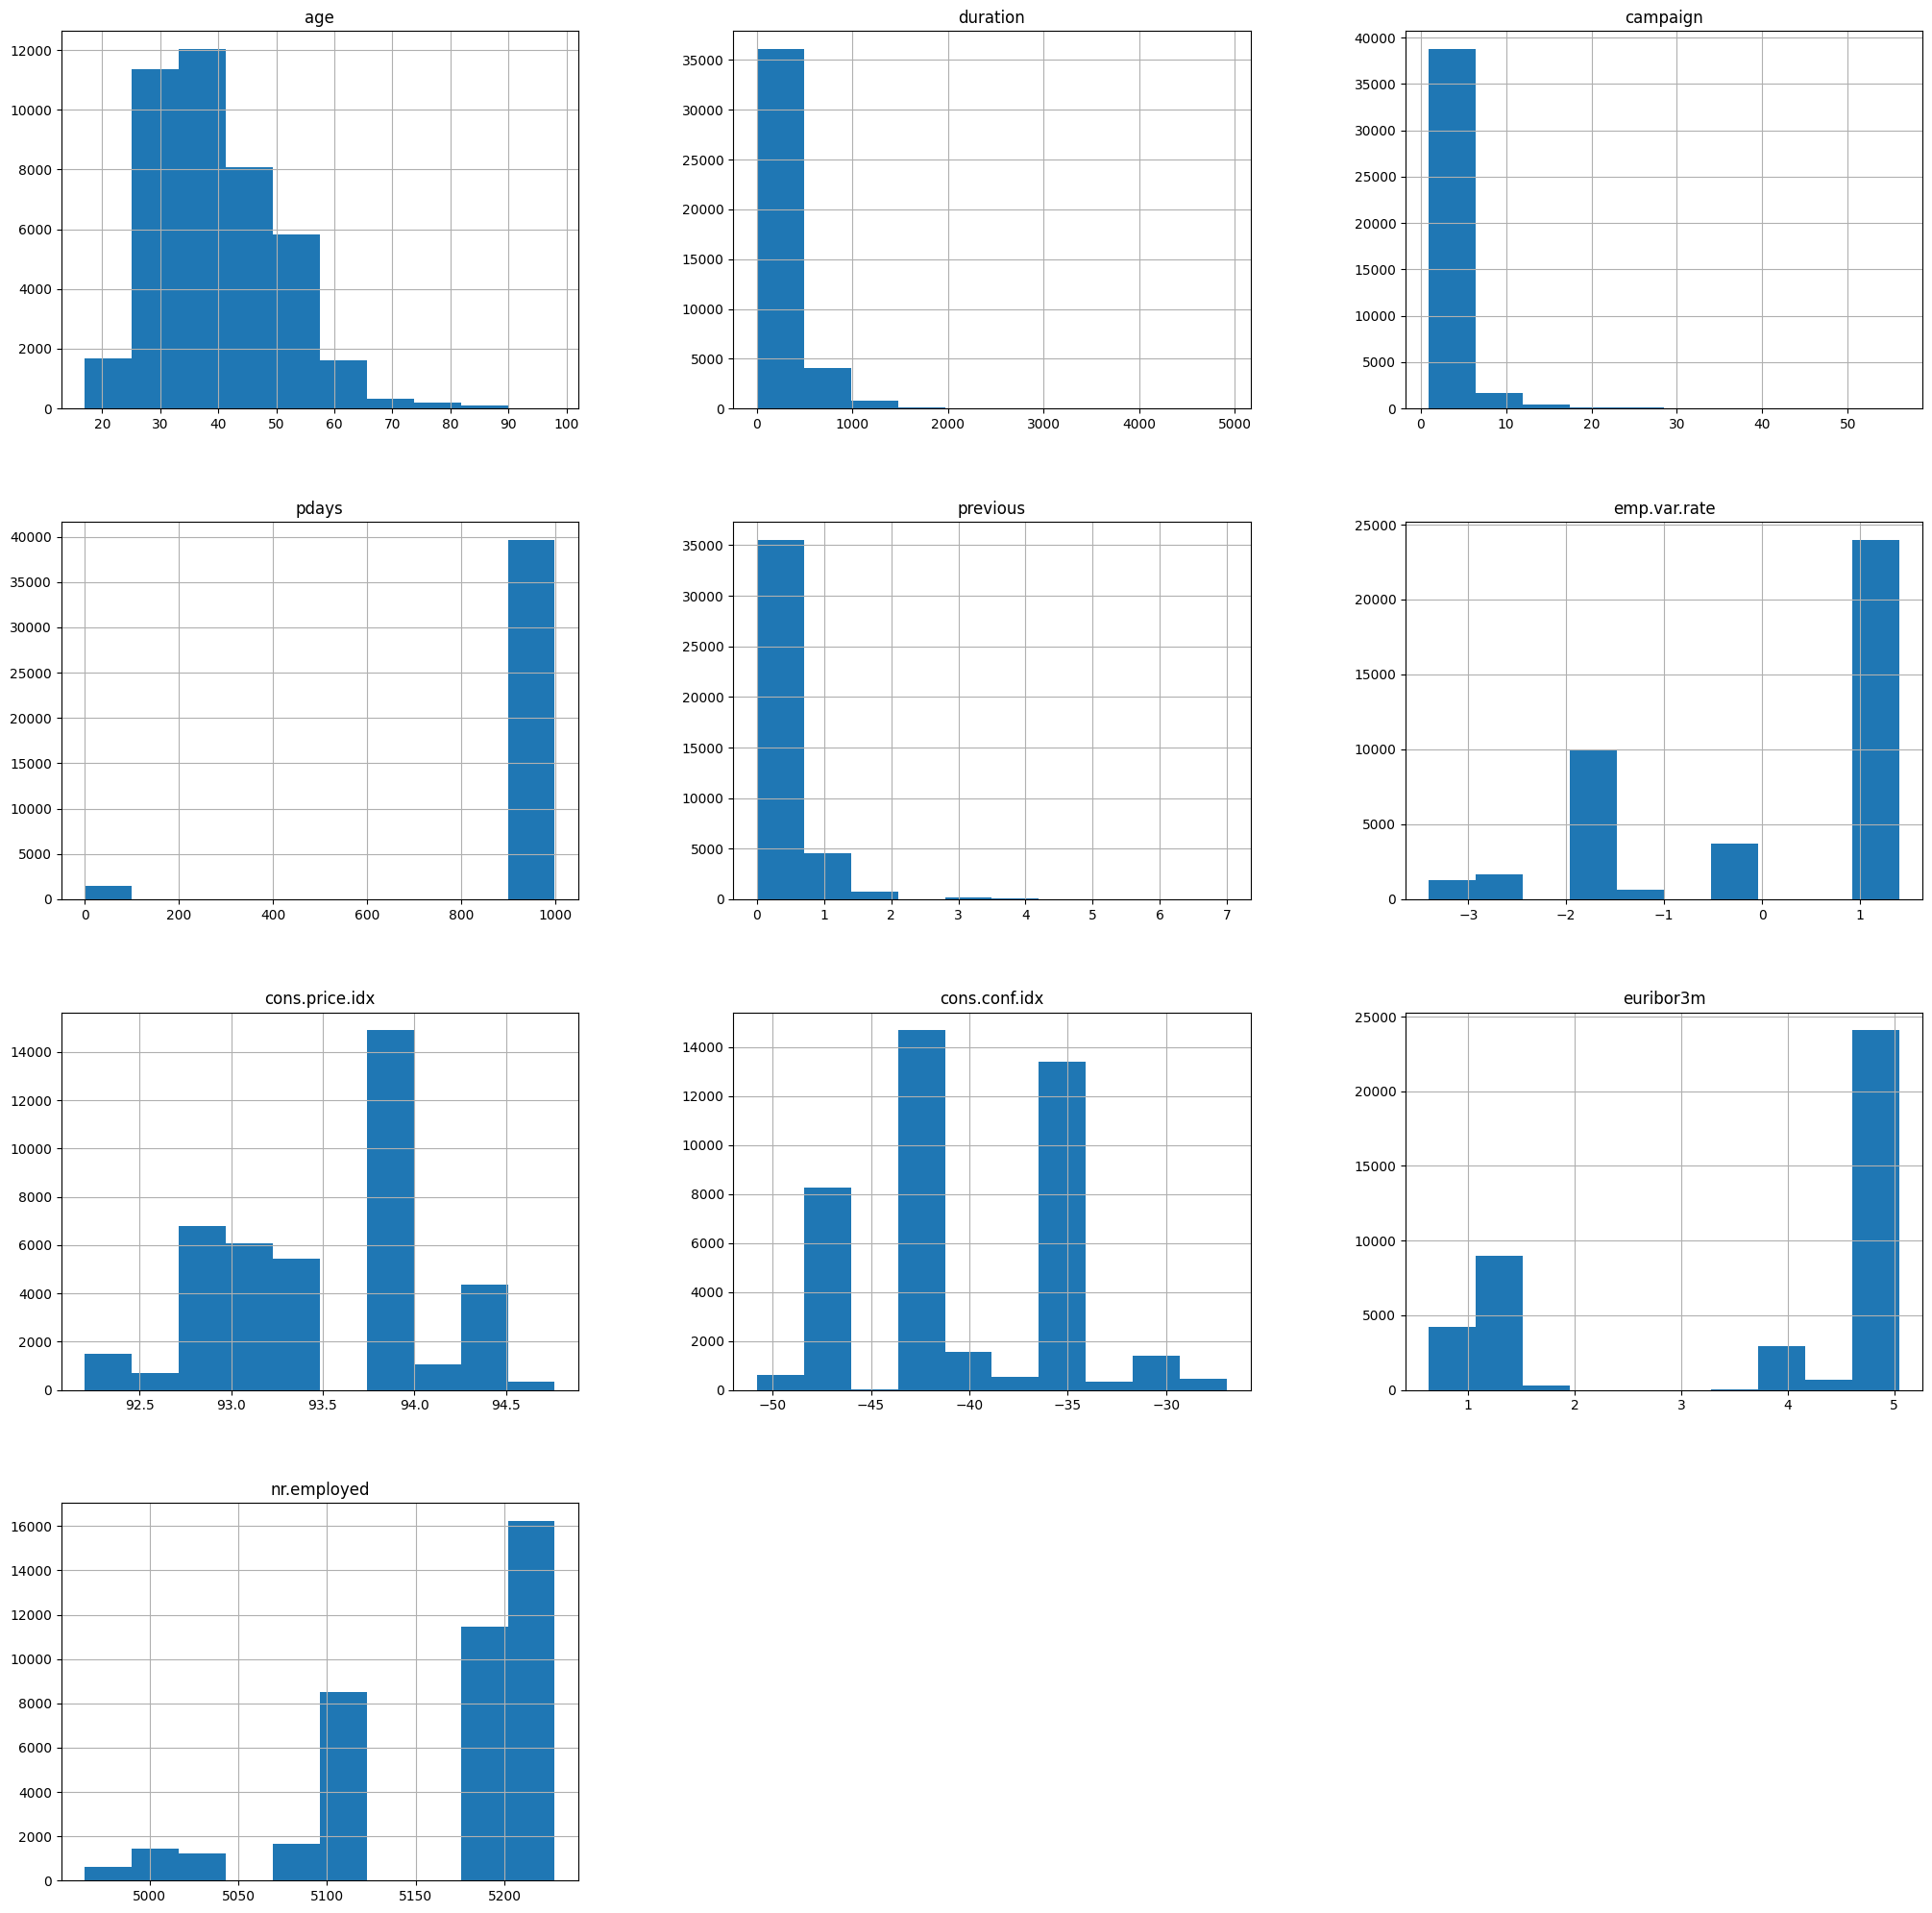

In [330]:
data2.hist(figsize = (25,25))

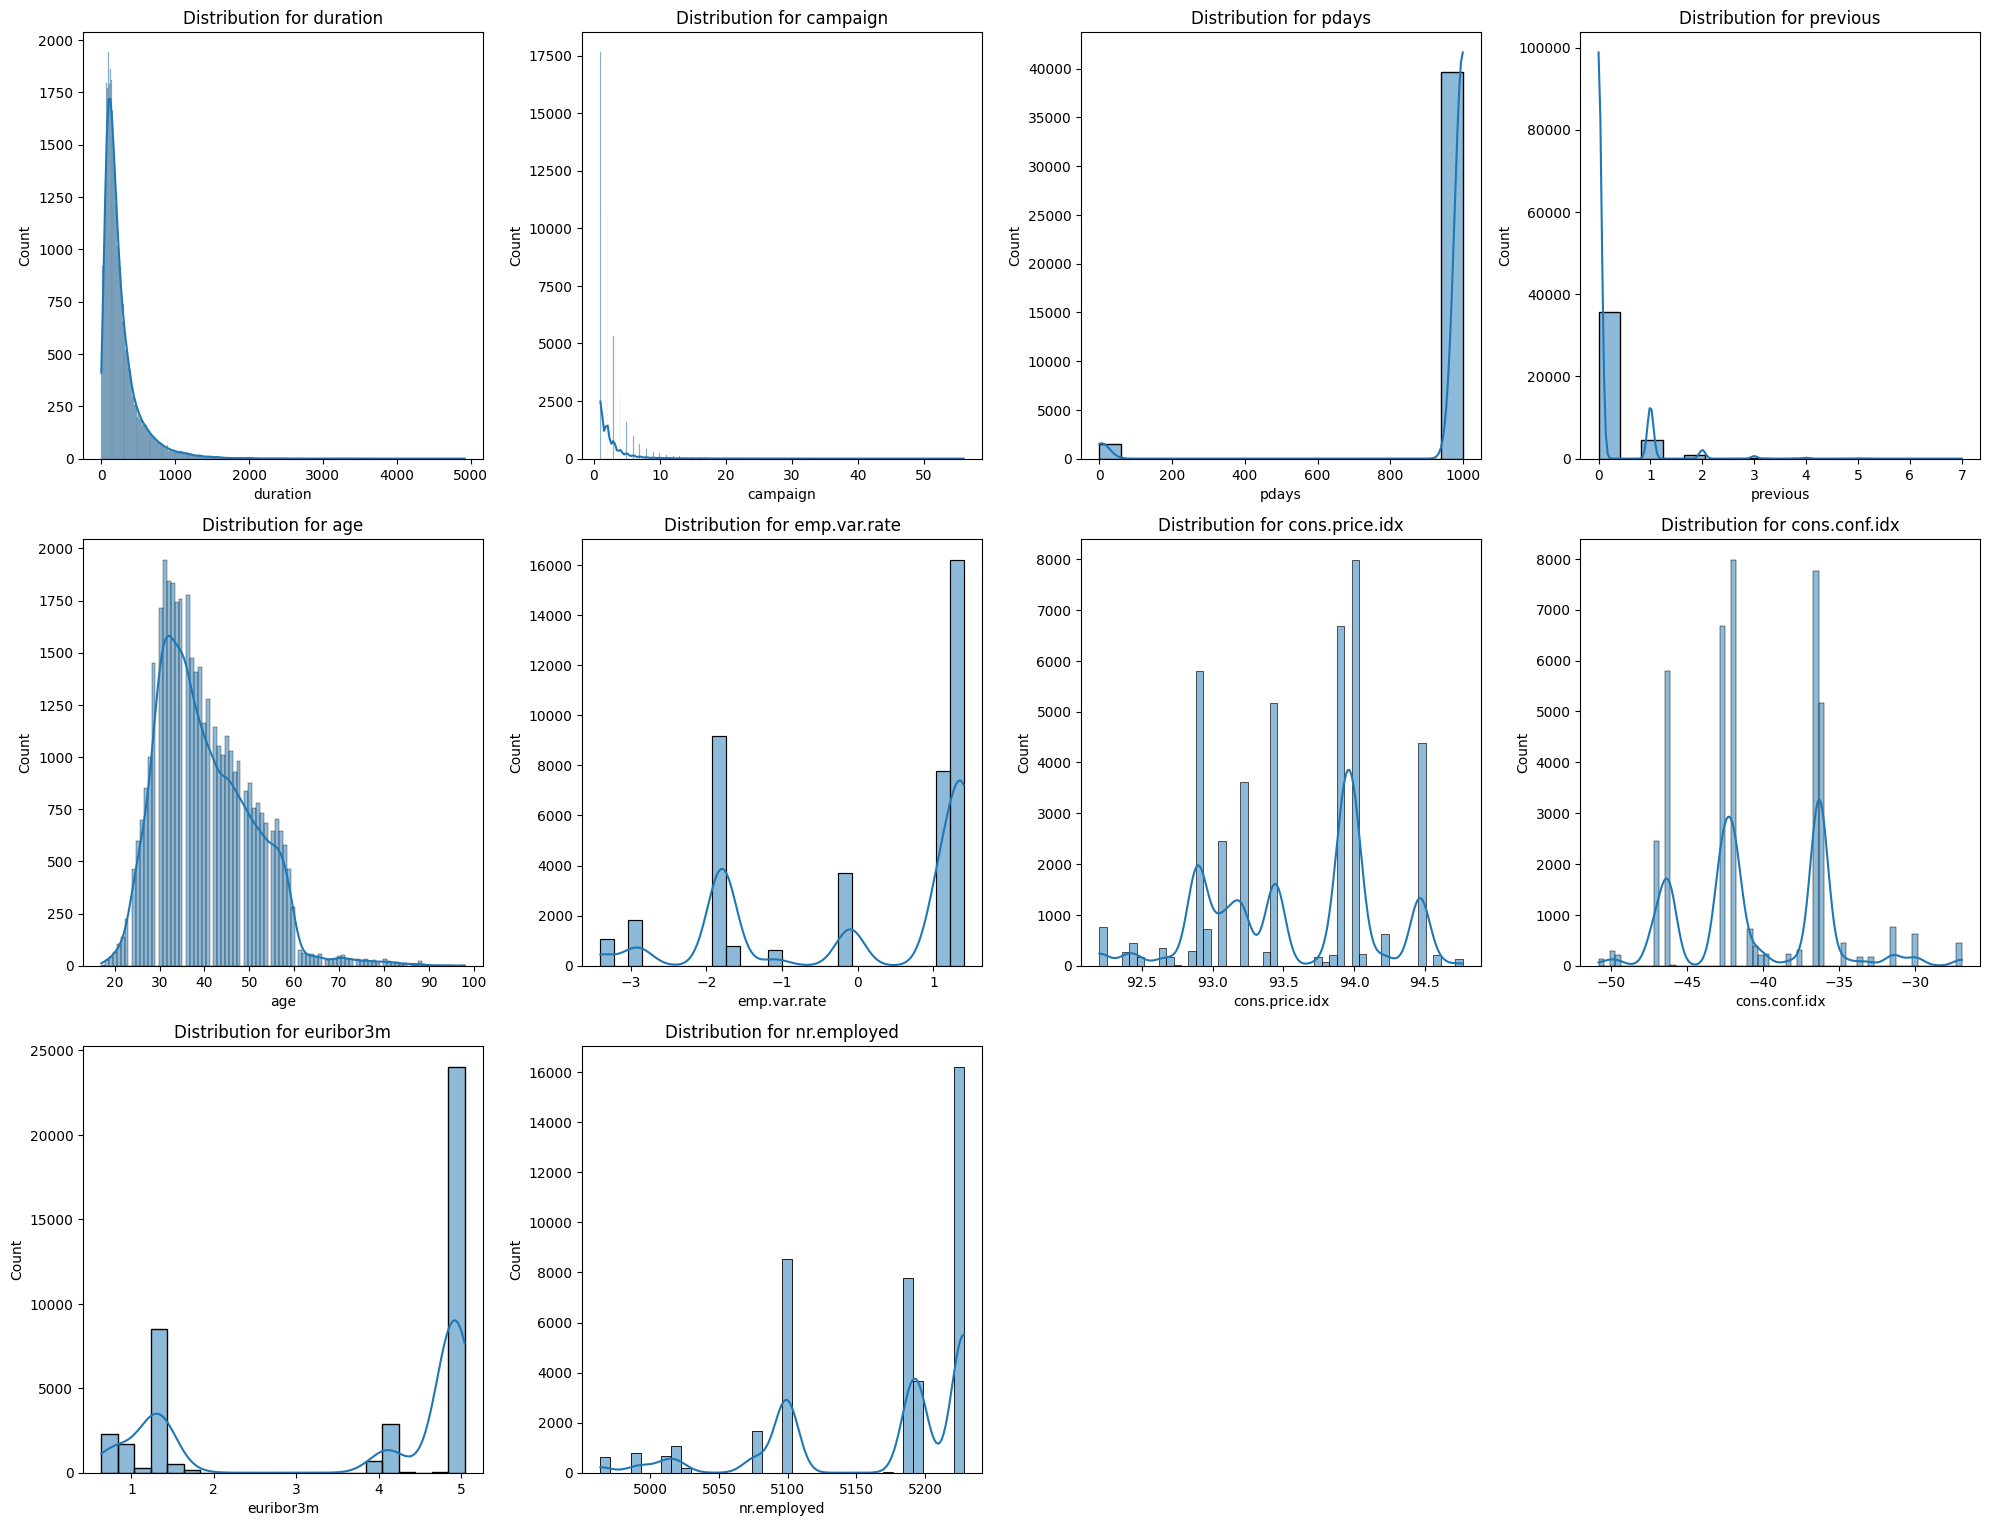

In [331]:
plt.figure(figsize=(20, 20)) 

for i, column in enumerate(numerical):
    plt.subplot(4, 4, i + 1)
    sns.histplot(x=data2[column], kde=True)
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()

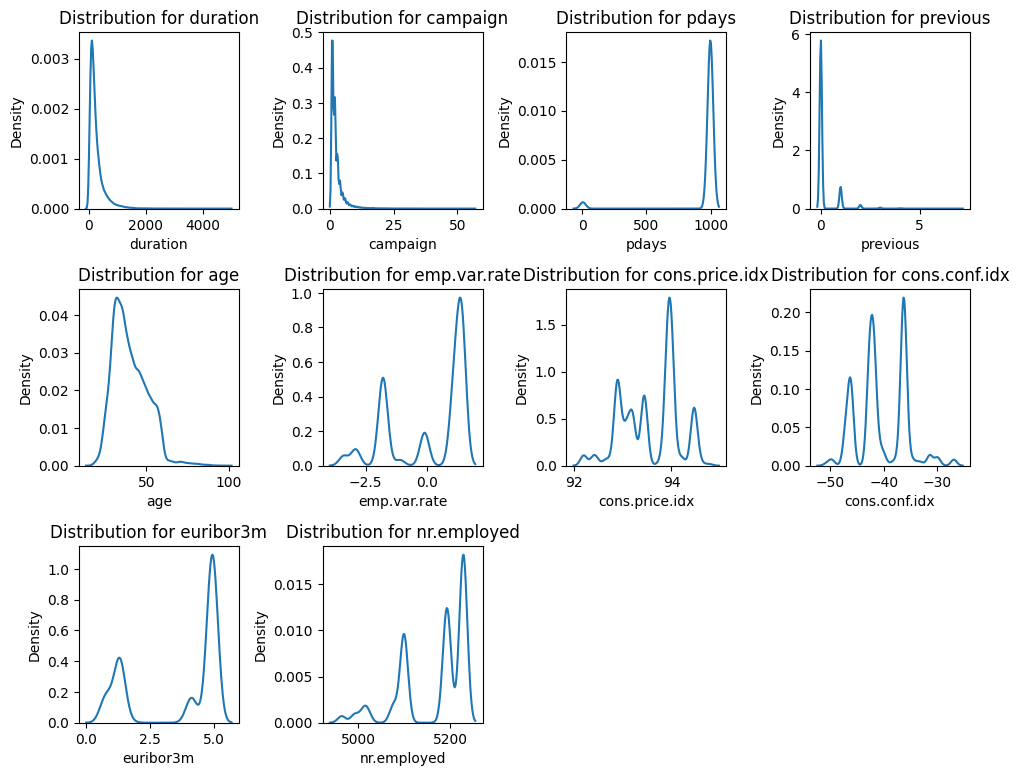

In [332]:
plt.figure(figsize=(10, 10))

for i, column in enumerate(numerical):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(x=data2[column])
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()

Primećujemo da neke od kolona kao što su duration, campaign, pdays i previous imaju veoma lošu raspodelu vrednosti, a da kolona age sadrži dosta primeraka van Gausove raspodele. Ovo možemo i dodatno proveriti korišćenjem boxplot dijagrama.

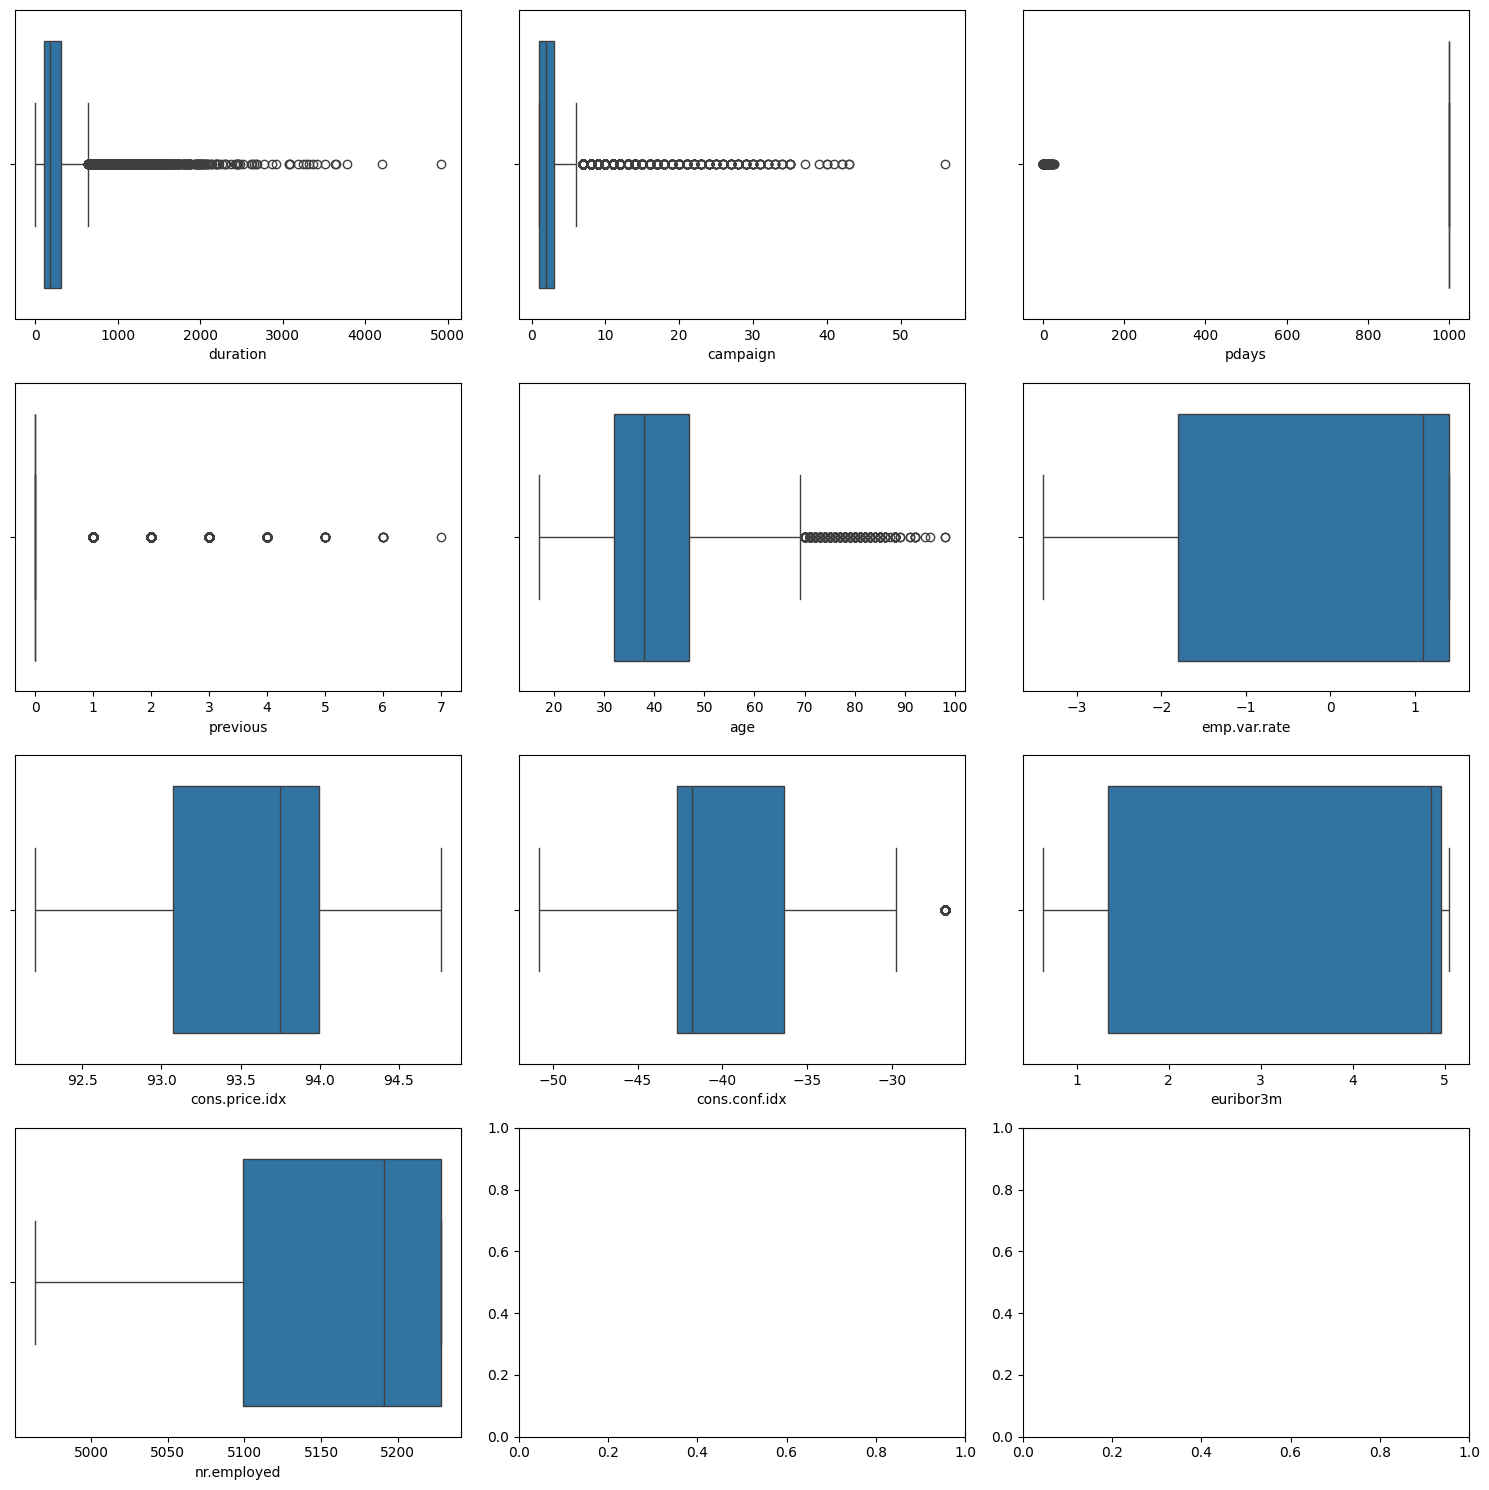

In [333]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(numerical):
    if column != 'y' and idx < 15:  
        sns.boxplot(x=data2[column], ax=axes[idx])
        
plt.tight_layout()
plt.show()

Na osnovu ovakvih raspodela, možemo zaključiti da će nad određenim kolonama verovatno biti potrebno primeniti različite transformacije

### Mere centralne tendencije

Provera opsega atributa

In [334]:
def print_attribute_ranges(dataframe):
    for column in dataframe.columns:
        if column != "y":
            column_range = dataframe[column].min(), dataframe[column].max()
            print(f"{column} range: {column_range}")

In [335]:
print_attribute_ranges(data2)

age range: (17, 98)
job range: ('admin.', 'unknown')
marital range: ('divorced', 'unknown')
education range: ('basic.4y', 'unknown')
default range: ('no', 'yes')
housing range: ('no', 'yes')
loan range: ('no', 'yes')
contact range: ('cellular', 'telephone')
month range: ('apr', 'sep')
day_of_week range: ('fri', 'wed')
duration range: (0, 4918)
campaign range: (1, 56)
pdays range: (0, 999)
previous range: (0, 7)
poutcome range: ('failure', 'success')
emp.var.rate range: (-3.4, 1.4)
cons.price.idx range: (92.201, 94.767)
cons.conf.idx range: (-50.8, -26.9)
euribor3m range: (0.634, 5.045)
nr.employed range: (4963.6, 5228.1)


In [336]:
data2.mean(numeric_only=True)

age                 40.023800
duration           258.315815
campaign             2.567879
pdays              962.464810
previous             0.173013
emp.var.rate         0.081922
cons.price.idx      93.575720
cons.conf.idx      -40.502863
euribor3m            3.621293
nr.employed       5167.034870
dtype: float64

In [337]:
data2.median(numeric_only=True)

age                 38.000
duration           180.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate         1.100
cons.price.idx      93.749
cons.conf.idx      -41.800
euribor3m            4.857
nr.employed       5191.000
dtype: float64

In [338]:
data2.mode(axis=0).head(1)

age     job  marital          education default housing loan   contact  \
0  31.0  admin.  married  university.degree      no     yes   no  cellular   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         thu  ...       1.0  999.0       0.0  nonexistent          1.4   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5228.1  no  

[1 rows x 21 columns]

### Transformacija kategorickih atributa

Za početak, možemo primetiti da kolona default skoro da nema nijedan primerak sa vrednošću yes, a gotovo svi ostali primerci (oko 80%) imaju nepoznate vrednosti. Zaključujemo da ova kolona, iz navedenih razloga, ne nosi nikakve informacije od značaja i zbog toga je možemo izbaciti.

In [339]:
data2 = data2.drop(columns=['default'])

Obzirom da kolona education ima veoma mali broj primeraka sa vrednošću illiterate, svim ovim primercima možemo pripisati vrednost basic.4y, jer je osnovno četvorogodišnje obrazovanje sledeći najbliži stepen obrazovanja.

In [340]:
data2.loc[data2['education'] == 'illiterate', 'education'] = 'basic.4y'

Obzirom da neki od meseca u godini imaju veoma mali broj primeraka (posmatrajući kolonu month) u odnosu na ostale, umesto čuvanja podataka o konkretnom mesecu možemo čuvati podatke o kvartalu godine. U tu svrhu, uvodimo novu kolonu year_quartal, a kolonu month možemo izbaciti.

In [341]:
month_to_quartal = {'jan': 0, 'feb': 0, 'mar': 0,
                    'apr': 1, 'may': 1, 'jun': 1,
                    'jul': 2, 'aug': 2, 'sep': 2,
                    'oct': 3, 'nov': 3, 'dec': 3}

data2['year_quartal'] = data2['month'].map(month_to_quartal)
data2 = data2.drop('month', axis=1)
print(data2['year_quartal'].unique())
data2.head()

[1 2 3 0]


age        job  marital    education housing loan    contact day_of_week  \
0   56  housemaid  married     basic.4y      no   no  telephone         mon   
1   57   services  married  high.school      no   no  telephone         mon   
2   37   services  married  high.school     yes   no  telephone         mon   
3   40     admin.  married     basic.6y      no   no  telephone         mon   
4   56   services  married  high.school      no  yes  telephone         mon   

   duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0       261         1    999         0  nonexistent           1.1   
1       149         1    999         0  nonexistent           1.1   
2       226         1    999         0  nonexistent           1.1   
3       151         1    999         0  nonexistent           1.1   
4       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  year_quartal  
0          93.994          -36.4      4.857       5191.0  no             1  
1          93.994          -36.4      4.857       5191.0  no             1  
2          93.994          -36.4      4.857       5191.0  no             1  
3          93.994          -36.4      4.857       5191.0  no             1  
4          93.994          -36.4      4.857       5191.0  no             1

Kolona marital ima veoma mali broj primeraka sa nepoznatim vrednostima, pa zbog toga možemo izvršiti jednostavno izbacivanje.

In [342]:
data2 = data2.drop(data2[data2['marital'] == 'unknown'].index)

Što se ostalih kategoričkih kolona tiče, možemo izvršiti enkodiranje svih vrednosti, tako da nepoznate vrednosti kodiramo sa np.nan konstantom.

In [343]:
le = LabelEncoder()
data2['job'] = le.fit_transform(data2['job'])
unknown_job = le.transform(['unknown'])
data2['job'] = data2['job'].replace(unknown_job, np.nan)

In [344]:
le_edu = LabelEncoder()
data2['education'] = le_edu.fit_transform(data2['education'])
unknown_job = le_edu.transform(['unknown'])
data2['education'] = data2['education'].replace(unknown_job, np.nan)

In [345]:
data2['housing'] = data2['housing'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
data2['loan'] = data2['loan'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
data2['y'] = data2['y'].map({'no': 0, 'yes': 1})
data2['marital'] = data2['marital'].map(
    {'married': 1, 'single': 0, 'divorced': 2})
data2['contact'] = data2['contact'].map({'cellular': 1, 'telephone': 0})

In [349]:
data2 = pd.get_dummies(
    data=data2, columns=['day_of_week', 'poutcome']).astype('float64')

In [350]:
data2.head()

age  job  marital  education  housing  loan  contact  duration  campaign  \
0  56.0  3.0      1.0        0.0      0.0   0.0      0.0     261.0       1.0   
1  57.0  7.0      1.0        3.0      0.0   0.0      0.0     149.0       1.0   
2  37.0  7.0      1.0        3.0      1.0   0.0      0.0     226.0       1.0   
3  40.0  0.0      1.0        1.0      0.0   0.0      0.0     151.0       1.0   
4  56.0  7.0      1.0        3.0      0.0   1.0      0.0     307.0       1.0   

   pdays  ...    y  year_quartal  day_of_week_fri  day_of_week_mon  \
0  999.0  ...  0.0           1.0              0.0              1.0   
1  999.0  ...  0.0           1.0              0.0              1.0   
2  999.0  ...  0.0           1.0              0.0              1.0   
3  999.0  ...  0.0           1.0              0.0              1.0   
4  999.0  ...  0.0           1.0              0.0              1.0   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
0              0.0              0.0              0.0               0.0   
1              0.0              0.0              0.0               0.0   
2              0.0              0.0              0.0               0.0   
3              0.0              0.0              0.0               0.0   
4              0.0              0.0              0.0               0.0   

   poutcome_nonexistent  poutcome_success  
0                   1.0               0.0  
1                   1.0               0.0  
2                   1.0               0.0  
3                   1.0               0.0  
4                   1.0               0.0  

[5 rows x 26 columns]

In [351]:
data2.dtypes

age                     float64
job                     float64
marital                 float64
education               float64
housing                 float64
loan                    float64
contact                 float64
duration                float64
campaign                float64
pdays                   float64
previous                float64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
y                       float64
year_quartal            float64
day_of_week_fri         float64
day_of_week_mon         float64
day_of_week_thu         float64
day_of_week_tue         float64
day_of_week_wed         float64
poutcome_failure        float64
poutcome_nonexistent    float64
poutcome_success        float64
dtype: object

Popunjavanje nedostajucih vrednosti

In [355]:
imputer = KNNImputer(n_neighbors=1, missing_values=np.nan)
data2 = pd.DataFrame(imputer.fit_transform(data2), columns=data2.columns)

### Matrica korelacije

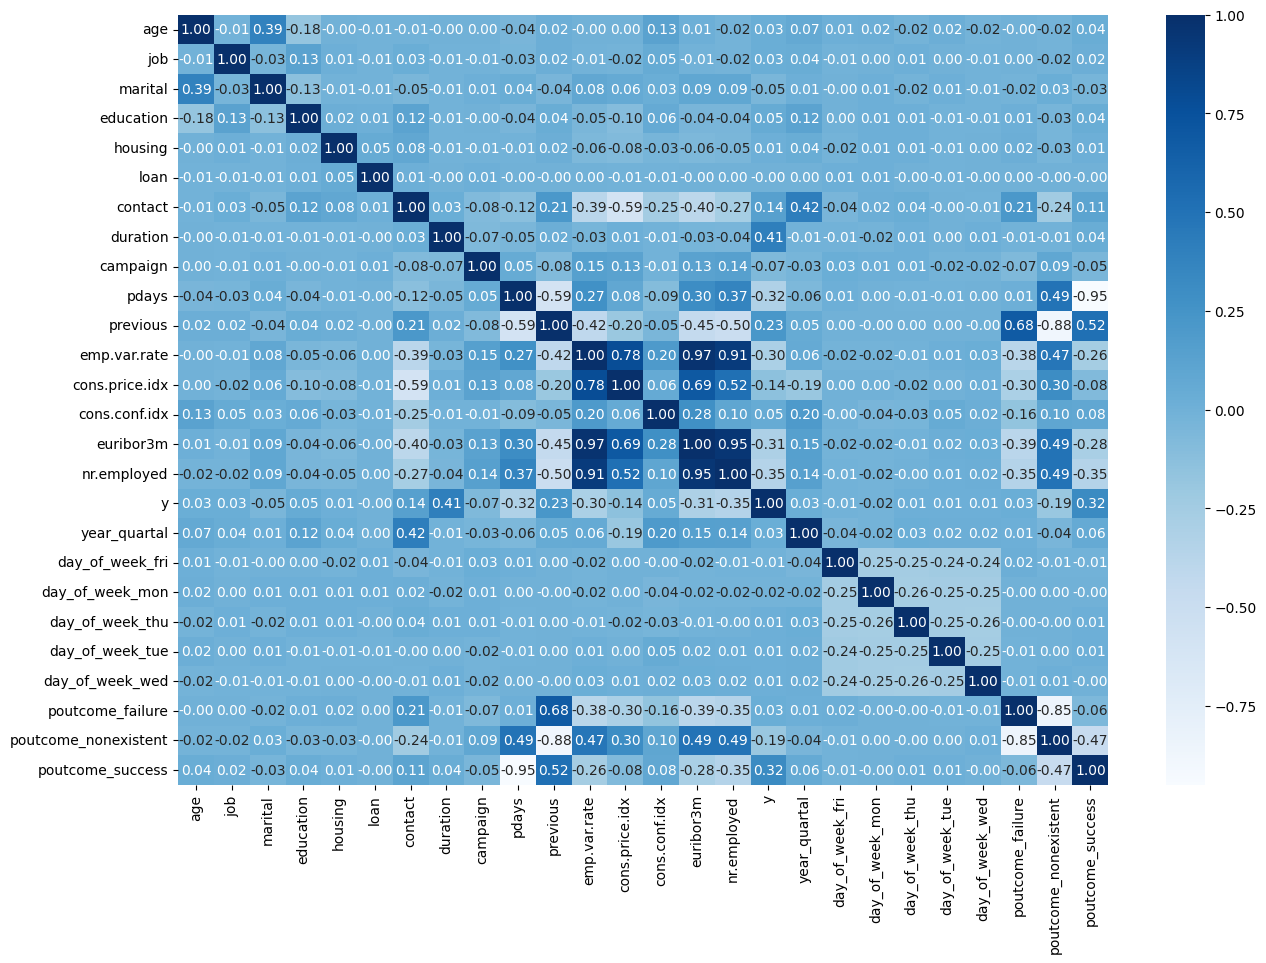

In [358]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data2.corr().round(2), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()

Zakljucujemo da su visoko korelisani atributi: euribor3m,emp.var.rate i nr.employed

### Varijansa i standardna devijacija

In [360]:
data2.var(numeric_only=True).round(2).sort_values()

poutcome_success            0.03
poutcome_failure            0.09
y                           0.10
poutcome_nonexistent        0.12
loan                        0.13
day_of_week_fri             0.15
day_of_week_wed             0.16
day_of_week_tue             0.16
day_of_week_mon             0.16
day_of_week_thu             0.17
contact                     0.23
previous                    0.24
housing                     0.25
cons.price.idx              0.33
marital                     0.36
year_quartal                0.51
emp.var.rate                2.47
education                   2.70
euribor3m                   3.01
campaign                    7.66
job                        12.58
cons.conf.idx              21.41
age                       108.58
nr.employed              5220.81
pdays                   34900.37
duration                67208.13
dtype: float64

In [361]:
data2.std(numeric_only=True).round(2).sort_values()

poutcome_success          0.18
poutcome_failure          0.30
y                         0.32
poutcome_nonexistent      0.34
loan                      0.36
day_of_week_fri           0.39
day_of_week_wed           0.40
day_of_week_tue           0.40
day_of_week_mon           0.40
day_of_week_thu           0.41
contact                   0.48
previous                  0.49
housing                   0.50
cons.price.idx            0.58
marital                   0.60
year_quartal              0.72
emp.var.rate              1.57
education                 1.64
euribor3m                 1.73
campaign                  2.77
job                       3.55
cons.conf.idx             4.63
age                      10.42
nr.employed              72.26
pdays                   186.82
duration                259.25
dtype: float64

### Podela podataka na train i test

#### Podela osnovnog skupa podataka

In [362]:
data2c=data2.copy()

X = data2c.drop('y', axis=1)
y = data2c['y']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 28767
Broj uzoraka u test skupu podataka: 12329


##### SVC

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     10898
         1.0       0.64      0.23      0.33      1431

    accuracy                           0.90     12329
   macro avg       0.77      0.60      0.64     12329
weighted avg       0.88      0.90      0.87     12329



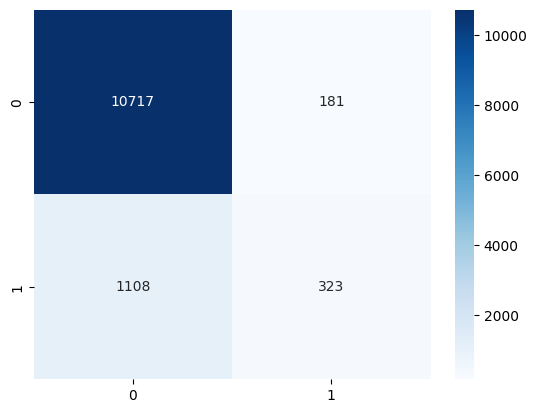

In [363]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     10898
         1.0       0.68      0.51      0.58      1431

    accuracy                           0.92     12329
   macro avg       0.81      0.74      0.77     12329
weighted avg       0.91      0.92      0.91     12329



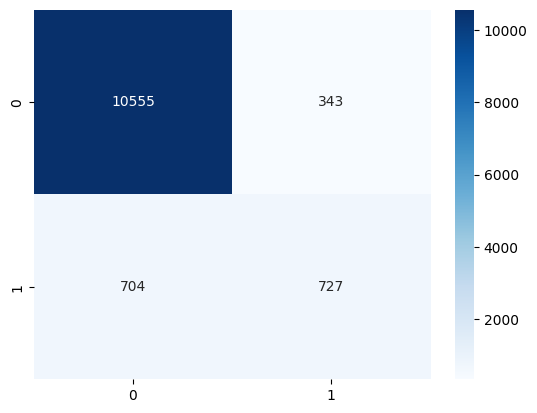

In [364]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

#### Podela skupa na osnovu balansiranosti dataseta

In [374]:
data2c=data2.copy()
data2c.head()
X = data2c.drop('y', axis=1)
y = data2c['y']

print("Before SMOTEENN, counts of 'No': {}".format(sum(y == 0)))
print("Before SMOTEENN, counts of 'Yes': {}".format(sum(y == 1)))

sm = SMOTEENN(random_state=2)  
X_res, y_res = sm.fit_resample(X, y.ravel())

balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['y'] = y_res

print("After SMOTEENN, counts of 'No': {}".format(sum(y_res == 0 )))
print("After SMOTEENN, counts of 'Yes': {}".format(sum(y_res == 1 )))

Before SMOTEENN, counts of 'No': 36469
Before SMOTEENN, counts of 'Yes': 4627


After SMOTEENN, counts of 'No': 29886
After SMOTEENN, counts of 'Yes': 34678


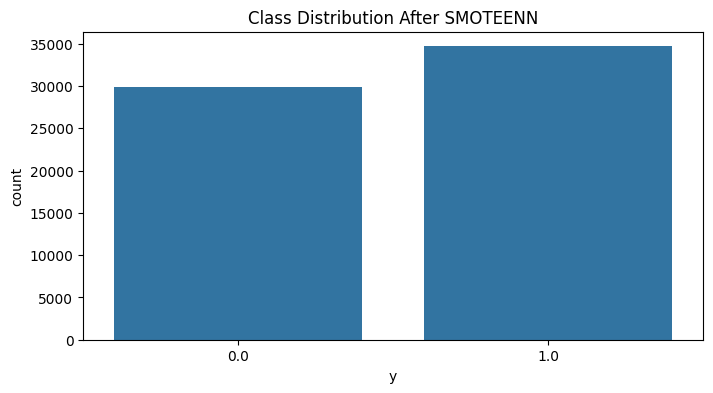

In [376]:
plt.figure(figsize=(8, 4))
sns.countplot(x='y', data=balanced_df)
plt.title("Class Distribution After SMOTEENN")
plt.show()

In [371]:
X = balanced_df.drop('y', axis=1)
y = balanced_df['y']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 45194
Broj uzoraka u test skupu podataka: 19370


##### SVC

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      9050
         1.0       0.92      0.91      0.91     10320

    accuracy                           0.91     19370
   macro avg       0.91      0.91      0.91     19370
weighted avg       0.91      0.91      0.91     19370



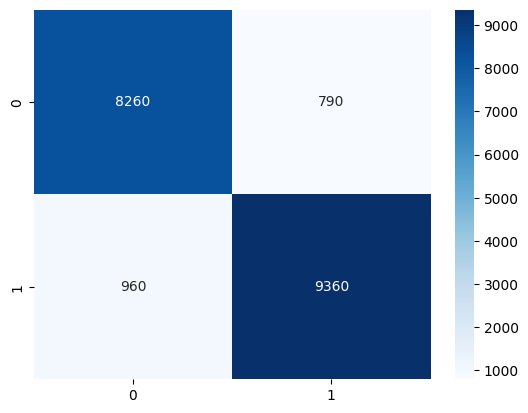

In [372]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      9050
         1.0       0.98      0.99      0.98     10320

    accuracy                           0.98     19370
   macro avg       0.98      0.98      0.98     19370
weighted avg       0.98      0.98      0.98     19370



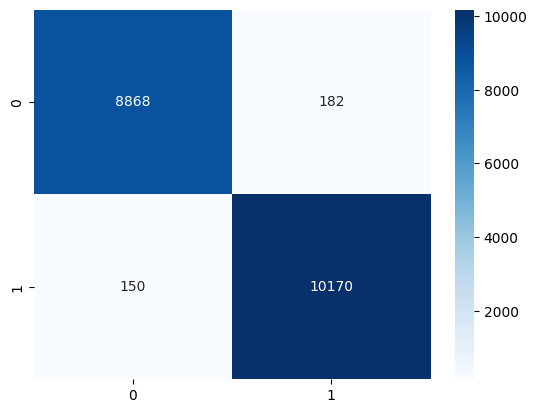

In [373]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

#### Podela skupa na osnovu raspodele podataka

Za transformaciju pojedinih kolona možemo iskoristiti logaritamsku transformaciju. Ovaj vid transformacije je pogodno koristiti kada imamo lošu raspodelu vrednosti po nekim kolonama, kao što je to situacija za kolone campaign i duration.

In [381]:
def log_transform(df, column_name):
    minimum = df[column_name].min()
    df[column_name] = df[column_name]-minimum+1
    df[column_name] = np.log(df[column_name])

In [382]:
data_transformation=data2.copy()

for column in ['campaign', 'duration']:
    log_transform(data_log_transformation, column)

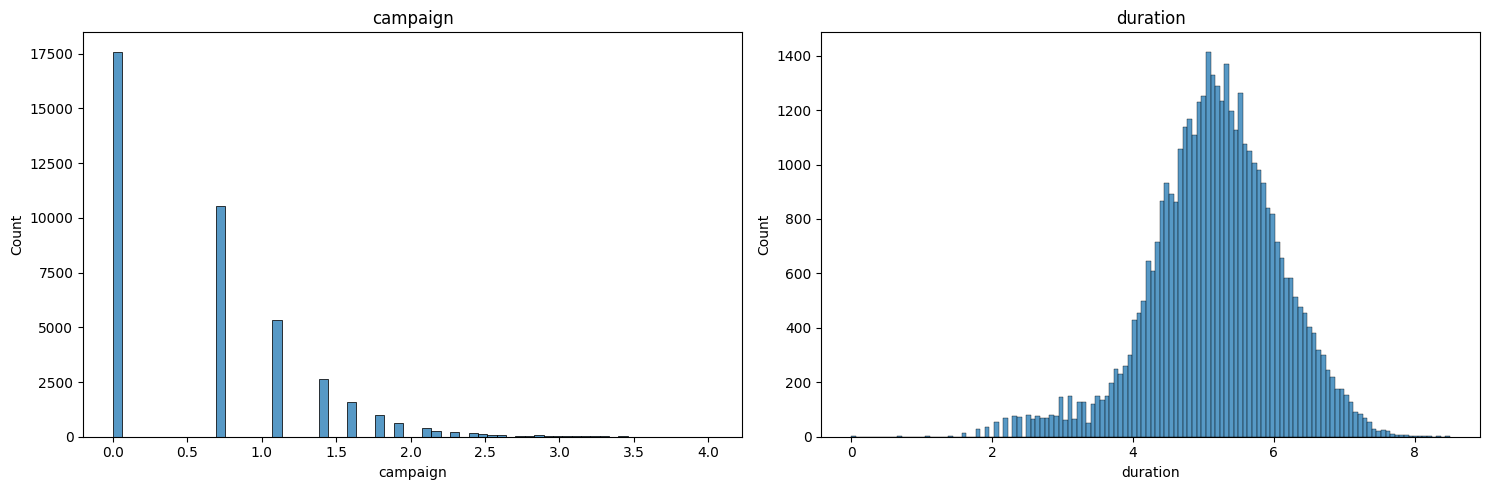

In [380]:
X = data_transformation
selected_columns = ['campaign', 'duration']
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

for i, column in enumerate(selected_columns):
    sns.histplot(X[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

Što se tiče kolona pdays i previous, možemo ih kodirati binarno na sledeći način

___pdays___ - 0 ako prethodno nije kontaktiran, 1 ako jeste      
___previous___ - 0 ako nije kontaktiran u prethodnoj kampanji, 1 ako jeste

In [383]:
data_transformation['pdays'] = data_transformation['pdays'].apply(lambda x: 0 if x == 999 else 1)
data_transformation['previous'] = data_transformation['previous'].apply(lambda x: 0 if x < 0.5 else 1)

Kolona poutcome_nonexistent je neupotrebljiva jer sadrzi nepoznate vrednosti.

In [385]:
data_transformation = data_transformation.drop(columns=['poutcome_nonexistent'])

In [386]:
X = data_transformation.drop('y', axis=1)
y = data_transformation['y']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 28767
Broj uzoraka u test skupu podataka: 12329


##### SVC

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     10891
         1.0       0.64      0.06      0.11      1438

    accuracy                           0.89     12329
   macro avg       0.77      0.53      0.52     12329
weighted avg       0.86      0.89      0.84     12329



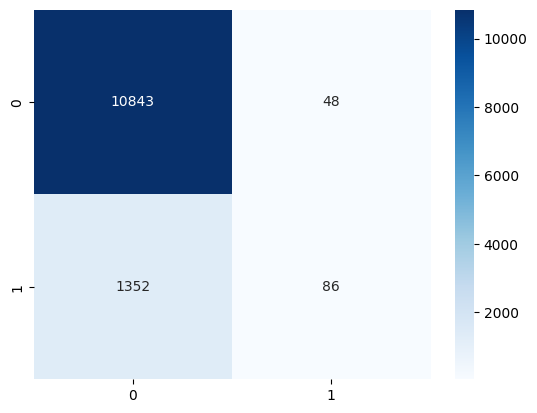

In [387]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     10891
         1.0       0.64      0.47      0.54      1438

    accuracy                           0.91     12329
   macro avg       0.78      0.72      0.75     12329
weighted avg       0.90      0.91      0.90     12329



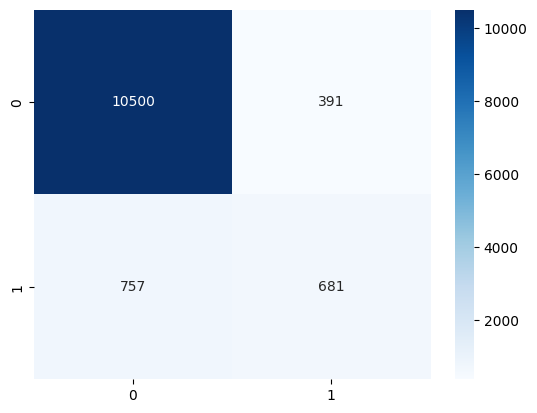

In [388]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

#### Podela skupa na osnovu outliera

Otklonicemo outliere pomocu IRQ metode.

In [389]:
def remove_outliers(df,columns):
    data_outliers = df.copy()  
    outlier_counts = {}  
    
    for col in columns:
        if col != 'y':
            q25 = np.percentile(df[col], 25)
            q75 = np.percentile(df[col], 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            outliers_removed = (df[col] < lo) | (df[col] > up)
            num_outliers_removed = outliers_removed.sum()
            data_outliers[col] = df[col].clip(upper=up, lower=lo)
            outlier_counts[col] = num_outliers_removed
    
    outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Num_Outliers_Removed'])
    return data_outliers, outlier_df

In [390]:
columns=['age','duration','campaign']
data_outliers, outlier_counts_df = remove_outliers(data2,columns)
print("New DataFrame:")
print(data_outliers.head(n=5))
print("\nOutlier Counts:")
print(outlier_counts_df.head())

New DataFrame:
    age  job  marital  education  housing  loan  contact  duration  campaign  \
0  56.0  3.0      1.0        0.0      0.0   0.0      0.0     261.0       1.0   
1  57.0  7.0      1.0        3.0      0.0   0.0      0.0     149.0       1.0   
2  37.0  7.0      1.0        3.0      1.0   0.0      0.0     226.0       1.0   
3  40.0  0.0      1.0        1.0      0.0   0.0      0.0     151.0       1.0   
4  56.0  7.0      1.0        3.0      0.0   1.0      0.0     307.0       1.0   

   pdays  ...    y  year_quartal  day_of_week_fri  day_of_week_mon  \
0  999.0  ...  0.0           1.0              0.0              1.0   
1  999.0  ...  0.0           1.0              0.0              1.0   
2  999.0  ...  0.0           1.0              0.0              1.0   
3  999.0  ...  0.0           1.0              0.0              1.0   
4  999.0  ...  0.0           1.0              0.0              1.0   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
0        

In [391]:
X = data_outliers.drop('y', axis=1)
y = data_outliers['y']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 28767
Broj uzoraka u test skupu podataka: 12329


##### SVC

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     10962
         1.0       0.65      0.21      0.32      1367

    accuracy                           0.90     12329
   macro avg       0.78      0.60      0.63     12329
weighted avg       0.88      0.90      0.88     12329



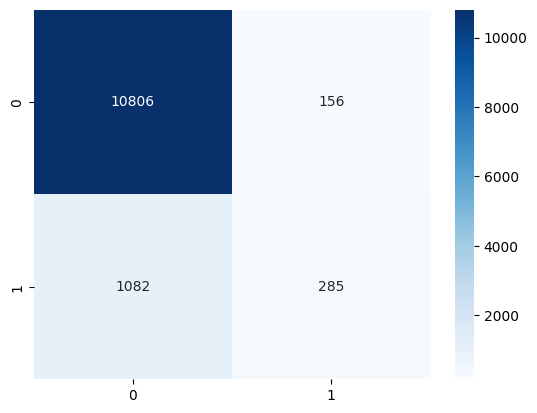

In [392]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     10962
         1.0       0.65      0.50      0.57      1367

    accuracy                           0.91     12329
   macro avg       0.80      0.73      0.76     12329
weighted avg       0.91      0.91      0.91     12329



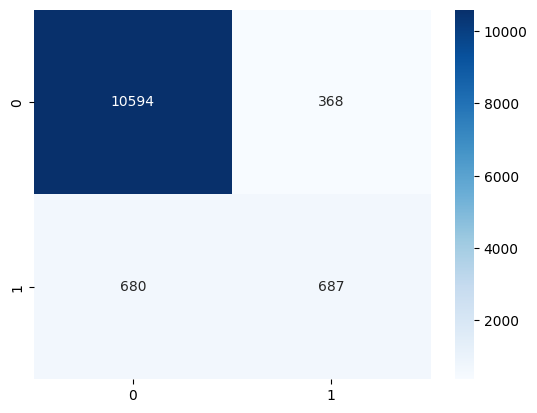

In [393]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

#### Podela skupa na osnovu matrice korelacije

In [394]:
columns_to_drop = ['emp.var.rate', 'nr.employed']

data_correlation = data2.drop(columns=columns_to_drop)

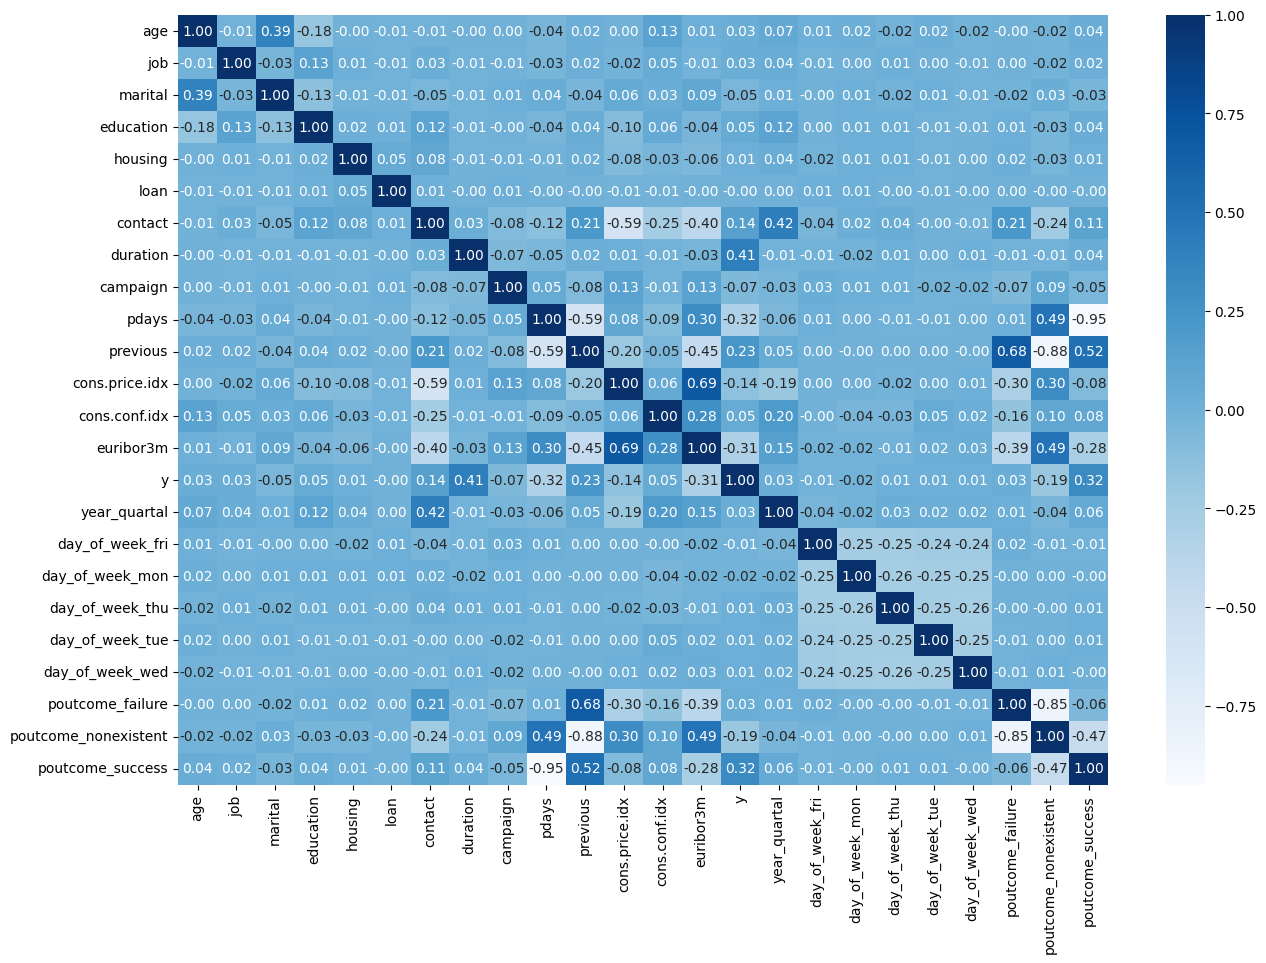

In [395]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data_correlation.corr().round(2), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()

Vidimo da veliku nisku korelaciju imaju u pdays i poutcome_success cak -0.95,izbacicemo pdays jer nam je poutcome_success bitna informacija.

In [396]:
columns_to_drop = ['pdays']

data_correlation = data2.drop(columns=columns_to_drop)

In [397]:
X = data_correlation.drop('y', axis=1)
y = data_correlation['y']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(x_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(x_test)}")

Broj uzoraka u trening skupu podataka: 28767
Broj uzoraka u test skupu podataka: 12329


##### SVC

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     10958
         1.0       0.66      0.03      0.06      1371

    accuracy                           0.89     12329
   macro avg       0.78      0.51      0.50     12329
weighted avg       0.87      0.89      0.84     12329



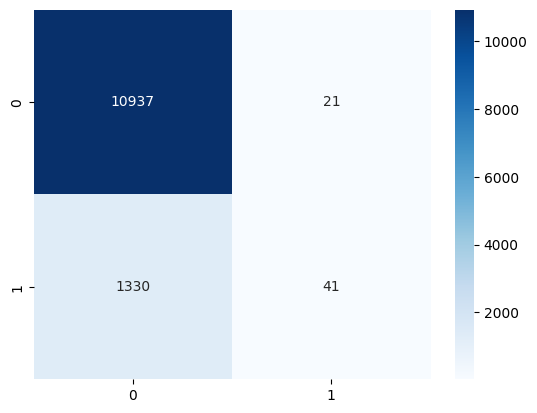

In [398]:
svc = SVC()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test, pred_svc))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_svc))
plt.show()

##### Random Forest

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     10958
         1.0       0.67      0.49      0.57      1371

    accuracy                           0.92     12329
   macro avg       0.80      0.73      0.76     12329
weighted avg       0.91      0.92      0.91     12329



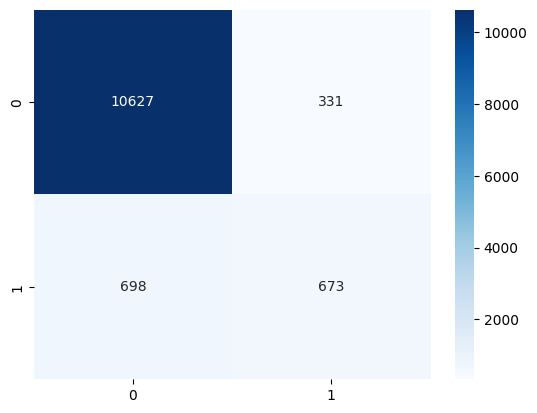

In [399]:
rfe=RandomForestClassifier()

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(x_train)
X_test=stdscaler.transform(x_test)
rfeModel = rfe.fit(X_train,y_train)

pred_rfe=rfe.predict(X_test)

con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, pred_rfe))
plt.show()

### Tabela sa rezultatima

|     Tip podele     |SVC accuracy     |Random Forest accuracy|
|:------------------:|:-------:|:-----------:|
|     Osnovni skup   |    0.90     |   0.92          |        
|     Balansirani    |    0.91     |   0.98       |        
| Raspodela podataka |     0.89   |     0.91       |        
|     Outlieri       |     0.90    |     0.91       |                
|     Korelacija     |     0.89    |      0.92       |              

## Zakljucak

<span style="color:purple;font-size:1.2em;">__Na osnovu pozicioniranja krive prilikom procesa raspodela podataka moguće je otkriti i pronaći "outlier" vrednosti u podacima.Outlier vrednosti predstavljaju vrednosti koje odstupaju od opsega većine podataka i sa njima se treba vrlo pažljivo rukovati kako bi se kreirani model mašinskog učenja što bolje prilagodio domenu problema koji se rešava. Osim toga, analiza raspodele podataka omogućava procenu balansiranosti dataseta, što je ključno za kvalitetnu klasifikaciju. Za otklanjanje outlier-a, koristila sam metodu interkvartilnog raspona (IQR), dok sam za balansiranje koristila SMOTEENN tehniku koja kombinuje tehnike oversampling-a (SMOTE) i undersampling-a (ENN). Takođe, primena raznih transformacija, poput logaritamske transformacije, može pomoći u normalizaciji raspodele podataka i uklanjanju asimetrije.__</span>     

<span style="color:green;font-size:1.2em;">__Na osnovu matrice korelacije možemo doneti sledeće zaključke:     
Korelacija predstavlja meru uslovljenosti promene vrednosti između dva atributa u posmatranom skupu podataka. Ako imamo visoko korelisane atribute, može doći do višestruke kolinearnosti, što može uzrokovati preprilagođavanje (overfitting) modela. U ovakvim situacijama, možemo razmotriti izbacivanje jednog od visoko korelisanih atributa ili primenu tehnika redukcije dimenzionalnosti kao što su analiza glavnih komponenti (PCA).__</span>        

<span style="color:orange;font-size:1.2em;">__Na osnovu vrednosti varijanse možemo doneti sledeće zaključke:     
Vrednost varijanse pojedinačnih atributa pruža uvid u rasprostranjenost podataka. Atributi sa veoma niskom varijansom ili veoma visokom varijansom mogu ukazivati na probleme kao što su nedostatak informacija ili preprilagođavanje (overfitting) modela na trening podacima. Za atributi sa veoma niskom varijansom, može biti korisno razmotriti izbacivanje tih atributa iz analize kako bi se smanjila dimenzionalnost skupa podataka. Za visoko varijantne atribute, možemo primeniti tehnike normalizacije ili standardizacije kako bismo uspostavili jednake skale vrednosti atributa.__</span>     


<span style="color:darkred;font-size:1.2em;">__Za sve ove korake, bitno je odabrati odgovarajuće algoritme za klasifikaciju, jer različiti algoritmi mogu imati različite performanse u zavisnosti od strukture podataka i cilja modeliranja. U ovom slučaju, za klasifikaciju su odabrani Support Vector Classifier (SVC) i Random Forest algoritam.   
SVC je osetljiv na nekoliko faktora, uključujući izbor parametara, nelinearnost problema, veličinu i dimenzionalnost podataka, balansiranje klasa i prisustvo outlier-a. Osetljivost na ove faktore može uticati na tačnost predikcije modela i zato je pogodan da vidimo kako sve ove stvari uticu na rezultat.Dok sa druge strane Random Forest je ensemble algoritam koji se sastoji od više stabala odlučivanja otporan je na overfitting, sposobnosti rukovanja sa velikim brojem atributa i veličinom podataka,takođe može efikasno raditi sa nelinearnim problemima i ne zahteva puno preprocesiranja podataka.__</span> 